In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Let's map some earthquakes!

Use this notebook to complete your final project for unit 1. You'll use a "for loop" and conditionals to select the right earthquakes to plot on your map and discover something about the seismic activity in your region.

## Data Setup
In this section we'll open up our data file and turn it into a list of lists that we can work with using "for loops".

We'll be making a graph, so import the matplotlib.pyplot library with the alias plt:

In [ ]:
import matplotlib.pyplot as plt


Next, we will open the data file using the open() function and then skip the first row using the .readline() function:

In [ ]:
all_quakes = open("/content/drive/My Drive/Colab Notebooks/quakes_project.txt")
all_quakes.readline()

# The \t in between each column name lets you know that this text file is separated by tabs

'YEAR\tFOCAL_DEPTH\tEQ_PRIMARY\tCOUNTRY\tSTATE\tLOCATION_NAME\tLATITUDE\tLONGITUDE\tREGION_CODE\tDEATHS\tDAMAGE_MILLIONS_DOLLARS\tHOUSES_DESTROYED\tHOUSES_DESTROYED_DESCRIPTION\tHOUSES_DAMAGED\n'

Currently our file is one long string. Let's make each line of the data file a list and put all of those lists into one big list called quakes_list. 

In [ ]:
quakes_list = []
for i in all_quakes:
    quakes_list.append(i.split('\t')) # The .split() method separates the items in each line

Print out the length of quakes_list to see how many earthquakes are in our data file:

In [ ]:
print(len(quakes_list))

4596


In [ ]:
print(quakes_list)

[['1800', '', '', 'MEXICO', '', '"MEXICO:  MEXICO CITY,OAXACA"', '19.2', '-99.1', '150', '', '', '', '', '\n'], ['1800', '', '', 'CANARY ISLANDS', '', 'CANARY ISLANDS:  PENON DE LA GOMERA', '28.1', '-17.1', '10', '', '', '', '', '\n'], ['1800', '', '6.5', 'IRAN', '', 'IRAN:  DAMAVAND', '36.2', '53.3', '140', '', '', '', '', '\n'], ['1801', '', '', 'MEXICO', '', 'MEXICO:  OAXACA', '17', '-96.3', '150', '7', '', '', '', '\n'], ['1801', '', '', 'SWITZERLAND', '', 'SWITZERLAND', '46.9', '8.6', '120', '', '', '', '', '\n'], ['1802', '', '', 'VENEZUELA', '', 'VENEZUELA: CUMANA', '10.3', '-64.5', '160', '', '', '', '', '\n'], ['1802', '', '', 'ANTIGUA AND BARBUDA', '', 'ANTIGUA ISLAND &  ST. CHRISTOPHER', '17.2', '-62.4', '90', '', '', '', '', '\n'], ['1802', '', '', 'ALGERIA', '', '"ALGERIA:  KOLEA, BLIDA, ALGIERS"', '36.5', '2.9', '15', '', '', '1100', '4', '1100\n'], ['1802', '', '', 'ITALY', '', 'ITALY:  SONCINO', '45.5', '10', '130', '', '', '', '', '\n'], ['1802', '150', '7.4', 'ROMANIA

## Selecting your data
In this section you'll decide which data you need for your project. You'll use "for loops" and conditionals to select the right data.

You will need latitudes and longitudes for your scatter plot, so create two empty lists to hold those values:

In [ ]:
latitude = []
longitude = []

Next, decide as a group what range of years you want to look at (between 1800 and 2018). You should base your decision on the research you did on the seismic activity in your region.



You'll also need to know the "region code" for your region:
- Africa: 10
- Central America: 100
- Central and South Pacific: 170
- North America: 150
- South America: 160

Create a "for loop" that loops through the lines in quakes_list and appends the latitute and longitude to the lists you created above **if** the earthquake for that row occurred in your region and during your year range.

Hints:
- You can nest an if statement inside another if statement
- You can compare a value to two other values like this: 5 < x < 10

In [ ]:
for i in quakes_list:
  if int (i[8]) == 160:
    if 1970 <= int(i[0]) <= 2007:
      latitude.append(float(i[6]))
      longitude.append(float(i[7]))
print(latitude)

[-4.0, -9.2, 6.2, -9.9, -52.0, -1.5, -22.28, -20.94, -2.7, -14.1, -32.5, -25.5, -6.8, -30.5, -30.6, 4.956, -32.5, -12.27, 7.75, -12.3, -38.5, 6.89, -22.124, 10.56, -38.18, -29.9, 10.04, 0.78, -20.52, 7.34, -31.03, -26.51, 1.598, 4.805, -16.39, -1.948, -13.347, 8.045, -13.166, -13.144, -33.134, 8.117, -12.69, -4.843, 2.461, -26.535, -9.159, -33.132, -34.131, -32.663, -33.053, -9.505, -33.071, -13.41, 10.77, 10.597, -5.494, -0.978, -8.143, 0.083, -17.897, -24.388, -19.022, -24.753, 1.134, 11.038, -0.059, -6.016, -6.062, 4.554, -6.038, -5.982, -15.679, 10.045, 7.075, 6.845, -11.652, 2.917, -13.841, -2.75, 4.104, 5.05, -28.906, -23.34, -22.118, -9.593, -1.036, -14.993, -30.933, -0.593, -17.731, 4.461, -13.64, -16.66, -16.086, -16.265, -14.258, -17.543, -29.67, -27.535, -19.384, -28.937, -30.608, 4.695, -37.695, -38.854, -28.573, -1.364, -5.852, -0.507, -5.678, -16.635, -19.987, -19.78, -13.457, -33.131, -3.987, 2.982, -2.312, -13.386, 2.082, -45.243, -32.689, -22.247, -15.048]


Print out the length of your latitude and longitude lists. Does this result make sense?

In [ ]:
print(len(latitude))
print(len(longitude))

125
125


## Making your graph
Now that you've created lists with your x data (longitude) and y data (latitude) it's time to make a scatter plot!

Replace the coordinates in plt.xlim and plt.ylim functions below as follows:
- Africa: x = (-25,50), y = (-40,45)
- Central America: x = (-100,-70), y = (0,25)
- Central and South Pacific: x = (80,180), y = (-70,30)
- North America: x = (-180,-50), y = (0,90)
- South America: x = (-120,-20), y = (-60,20)

<Figure size 432x288 with 0 Axes>

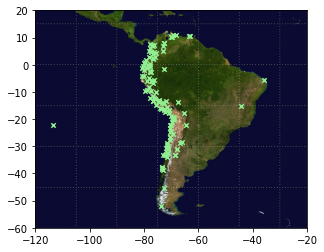

In [ ]:
# This function clears any leftover plots
plt.clf()

# This code adds an image behind your plot
image = plt.imread("/content/drive/My Drive/Colab Notebooks/earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

# This code crops the image to show only your region. 
# IMPORTANT: Replace the coordinates in plt.xlim and plt.ylim functions
# To match your region using the key above
plt.xlim(-120,-20)
plt.ylim(-60,20)

# Create a scatter plot using plt.scatter(). 
plt.scatter(longitude, latitude, s = 20, marker = "x", c ="lightgreen")

# You can change the size, shape, and color of your markers! 
# Try adding s = #, marker = "x", and c = "color"

# Don't forget plt.show()!
plt.show()

#plt.show()

### Modify the points on your graph!
You can find the complete list of possible markers here: https://matplotlib.org/api/markers_api.html 

and the possible colors here: https://i.stack.imgur.com/lFZum.png

### Download your graph

When you're happy with your graph, you can download it to your computer using the plt.savefig() function. This function takes two arguments: whatever you'd like to name the file in a string (ex: "quakes_graph.png") and dpi=1000. The file will be downloaded to the same folder as the Jupyter Notebook file.

**Note: You will need to comment out plt.show() and rerun your graphing code before running plt.savefig().** 

plt.show() outputs the graph and prevents you from downloading it to your computer.

In [ ]:
# Example: plt.savefig("quakes_graph.png", dpi = 1000)
plt.savefig("quakes_graph.png", dpi = 1000)
#plt.show()

<Figure size 432x288 with 0 Axes>

## Mapping tectonic plate boundaries
Copy and paste all your graphing code in the cell below. Then change replace **image = plt.imread("earth.jpg")** with **image = plt.imread("plates.png")**

Run your code and examine the results! Do you see what you expect?

<Figure size 432x288 with 0 Axes>

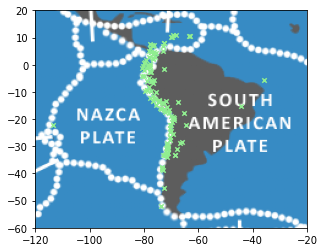

In [ ]:
# This function clears any leftover plots
plt.clf()

# This code adds an image behind your plot
image = plt.imread("/content/drive/My Drive/Colab Notebooks/plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

# This code crops the image to show only your region. 
# IMPORTANT: Replace the coordinates in plt.xlim and plt.ylim functions
# To match your region using the key above
plt.xlim(-120,-20)
plt.ylim(-60,20)

# Create a scatter plot using plt.scatter(). 
plt.scatter(longitude, latitude, s = 20, marker = "x", c ="lightgreen")

# You can change the size, shape, and color of your markers! 
# Try adding s = #, marker = "x", and c = "color"

# Don't forget plt.show()!
plt.show()

#plt.show()

# Bonus Challenge (Module 7 from Activity Notebook)

The dataset `volcano.csv` contains information about volcano populations and their locations. (Source: https://data.humdata.org/dataset/volcano-population-exposure-index-gvm/resource/e3b1ecf0-ec47-49f7-9011-6bbb7403ef6d)...

Using the following lists of information from the dataset, write a program that determines which region contains the most volcanoes with the highest population exposure index, and create a bar graph comparing each volcano in that region's volcano explosivity index. 

Hint: You may need the .mode() method from the `statistics` library. How would you use another library in Python?



In [ ]:
#Lists manually created using information from the volcano.csv dataset. 
#The indices of each list are similar to the rows in the dataset table.

longitudes = [6.85, 2.97, 2.53, -4.02, 10.8699999999999, 11.93, 12.6999999999999, 14.1389999999999, 14.426, 13.897, 14.83, 15.2129999999999, 15.07, 14.9499999999999, 14.962, 15.004, 12.6999999999999, 12.02, 23.3359999999999, 24.439, 25.396, 27.16, 27.14, 28.52, 33.6499999999999, 34.17, 34.57, 34.52, 35.4799999999999, 39.829999999999906, 42.229999999999905, 42.82, 43.216999999999906, 43.869999999999905, 44.299999999999905, 43.25, 42.45, 44.5, 44.0, 44.25, 43.6, 44.2, 44.75, 45.542, 45.78, 46.02, 41.829999999999906, 42.18, 42.75, 42.729999999999905, 39.82, 39.92, 40.299999999999905, 40.408, 40.508, 40.549999999999905, 40.6, 40.67, 40.63, 40.71999999999991, 41.808, 41.7, 41.649999999999906, 41.725, 41.6, 41.149999999999906, 41.07, 40.979999999999905, 40.85, 40.2, 40.57, 40.479999999999905, 40.07, 40.82, 40.25, 41.207999999999906, 41.45, 42.2, 42.399999999999906, 42.53, 42.43, 42.46999999999991, 41.479999999999905, 41.63, 41.27, 41.042, 40.701999999999906, 40.84, 40.329999999999906, 40.28, 40.13, 39.93, 39.75, 39.692, 39.63, 39.475, 38.979999999999905, 38.95, 39.35, 39.18, 39.03, 39.13, 39.07, 38.93, 38.35, 38.78, 38.579999999999906, 38.43, 38.1, 35.43, 37.829999999999906, 38.119999999999905, 37.57, 37.67, 35.88, 37.42, 36.049999999999905, 36.042, 36.6, 37.96999999999991, 36.57, 36.43, 37.899999999999906, 36.329999999999906, 36.229999999999905, 36.18, 36.119999999999905, 36.075, 37.869999999999905, 36.07, 34.5, 36.27, 36.21999999999991, 36.292, 36.445999999999906, 36.35, 35.914, 37.88, 37.35, 36.75, 31.93, 33.5829999999999, 33.7999999999999, 33.57, 33.3999999999999, 33.67, 33.78, 30.25, 30.25, 29.92, 30.0799999999999, 30.1909999999999, 29.3299999999999, 29.1999999999999, 29.25, 29.4499999999999, 29.492, 29.67, 29.7199999999999, 28.75, 6.58, 8.52, 8.63, 8.75, 9.17, 9.67, 9.83, 10.5, 13.67, 12.0, 8.5, 2.83, 10.83, 5.0, 5.83, 5.83, 17.5, 17.55, 16.3299999999999, 16.4499999999999, 17.28, 18.53, 24.27, 25.85, 26.4699999999999, 32.75, 33.8299999999999, 40.85, 37.0, 35.9699999999999, 36.63, 37.07, 36.424999999999905, 38.42, 36.17, 37.25, 37.75, 40.2, 39.92, 39.78, 41.38, 41.63, 42.829999999999906, 44.079999999999906, 44.235999999999905, 44.78, 44.67, 45.0, 46.1199999999999, 48.32999999999989, 50.63, 45.17, 46.43, 47.92, 52.109, 57.57, 60.0, 60.67, 61.13, 67.92, 67.9699999999999, 67.492, 43.329999999999906, 45.17, 43.38, 49.14999999999989, 48.4799999999999, 48.67, 46.77, 47.2, 55.713, 77.825, 77.51999999999991, 77.53, 73.513, 72.59999999999991, 69.5, 52.2, 51.75, 50.2299999999999, 37.95, 37.75, 80.75, 173.9, 174.27, 174.87, 176.25, 174.069999999999, 177.18, 176.5, 176.33, 176.08, 176.0, 175.642, 175.569999999999, 177.839, 178.027999999999, 178.196, 178.05, 178.478, 178.52699999999902, 178.973, 179.07499999999902, -179.18, 179.039999999999, -178.561, -178.47, -178.711999999999, -177.91999999999902, -177.18799999999902, -177.02, -175.65, -175.75, -175.53, -175.38, -175.41999999999902, -175.069999999999, -175.03, -174.87, -174.775, -174.65, -174.365, -174.32499999999902, -173.72, -173.66999999999902, -175.63, -174.229999999999, -173.75, -174.02, -169.057999999999, -169.454, -169.617999999999, -170.69999999999902, -171.72, -172.525, -176.16999999999902, -179.97, 179.4, 177.979999999999, 147.349999999999, 147.28, 147.78, 144.604999999999, 144.631, 144.818, 144.962999999999, 145.037, 145.964, 146.256, 146.75, 147.12, 147.875, 148.121, 148.093999999999, 148.569999999999, 148.41999999999902, 149.349999999999, 149.5, 150.108, 150.03, 150.069999999999, 150.03, 150.507, 150.52, 150.942, 151.099999999999, 151.229999999999, 151.33, 151.15799999999902, 150.849999999999, 152.203, 152.19999999999902, 143.15, 145.08, 145.858, 146.708, 147.569999999999, 148.15, 148.37, 148.13, 148.33, 149.069999999999, 149.13, 149.07499999999902, 150.349999999999, 150.53, 150.88, 152.642, 153.65, 154.93, 154.979999999999, 155.224999999999, 155.194999999999, 155.608, 155.62, 156.52, 157.03, 157.16999999999902, 157.94999999999902, 158.03, 159.729999999999, 159.819999999999, 165.8, 167.66999999999902, 167.47, 167.5, 168.05, 167.83, 168.12, 168.346, 168.37, 168.536, 168.592, 168.353, 169.229999999999, 169.442, 169.78, 170.28, 171.319999999999, 172.05, 168.63, 142.5, 94.28, 93.858, 95.658, 96.32899999999991, 96.8209999999999, 98.51999999999991, 98.39199999999991, 98.8299999999999, 98.93, 99.25499999999991, 99.209, 99.539, 99.67, 99.98, 100.2, 100.473, 100.31699999999901, 100.679, 101.264, 101.483, 101.59999999999901, 101.72799999999901, 102.02, 102.18, 102.37, 102.62, 103.13, 103.3, 103.62, 103.67, 103.92, 104.31999999999901, 104.27, 104.59999999999901, 105.625, 105.423, 105.97499999999901, 106.042, 106.7, 106.73, 106.98, 107.4, 107.63, 107.65, 107.59999999999901, 107.73, 107.72, 107.84, 107.95, 108.058, 108.06999999999901, 108.08, 108.4, 109.208, 109.92, 109.992, 110.06999999999901, 110.33, 110.4, 110.43, 110.44199999999901, 110.88, 111.19199999999901, 111.758, 112.308, 112.45, 112.58, 112.63, 112.68, 112.92, 112.95, 113.342, 113.58, 113.56999999999901, 114.042, 114.242, 114.37, 115.13, 115.375, 115.508, 116.47, 118.0, 119.06999999999901, 120.02, 120.48, 120.52, 120.95, 120.98, 121.18, 121.645, 121.77, 121.78, 121.81999999999901, 121.708, 122.45, 122.671, 122.775, 122.842, 123.258, 123.505, 123.38, 123.56999999999901, 123.57899999999901, 124.13, 123.95, 124.22, 124.675, 126.65, 128.675, 129.125, 129.5, 130.0, 130.292, 129.871, 121.608, 124.42, 124.73, 124.758, 124.83, 124.792, 124.858, 125.03, 125.2, 125.37, 125.4, 125.491, 125.5, 124.17, 127.83, 127.88, 127.67, 127.63, 127.53, 127.47, 127.42, 127.31999999999901, 127.33, 127.4, 127.4, 127.4, 127.4, 127.42, 127.48, 127.72, 117.88, 121.057, 125.375, 124.892, 125.06999999999901, 125.269, 126.047, 124.31999999999901, 124.45, 124.5, 124.8, 125.068, 123.63, 124.98, 124.673, 125.52, 123.17, 123.132, 123.25, 123.23, 125.221, 124.87, 124.535, 124.05, 123.958, 123.685, 123.59999999999901, 123.45699999999901, 123.38, 122.018, 121.48, 121.3, 120.99299999999901, 121.27, 120.47, 120.4, 120.34999999999901, 120.742, 120.805, 120.55, 120.98, 121.09999999999901, 122.123, 121.86, 122.202, 121.94, 121.75, 122.01, 110.09999999999901, 110.17, 109.12, 108.0, 108.2, 107.2, 109.014, 109.05, 95.25, 95.09999999999991, 95.98, 98.5, 134.75, 132.25, 121.18, 121.83, 121.92, 121.52, 122.2, 122.458, 123.93, 128.223, 128.997, 129.597, 129.714, 129.859, 129.625, 129.926999999999, 130.217, 130.307999999999, 130.569999999999, 130.657, 130.593999999999, 130.861999999999, 128.848999999999, 130.299, 131.104, 131.249, 131.43199999999902, 131.599999999999, 131.40199999999902, 133.334, 139.098, 139.024, 138.730999999999, 138.3, 137.479999999999, 136.774, 137.55699999999902, 137.59, 137.593999999999, 137.592999999999, 138.03899999999902, 138.12, 138.526, 138.535, 138.519, 138.881, 139.196, 139.28899999999902, 139.378999999999, 139.494, 139.509999999999, 139.78, 139.966, 139.579, 140.075999999999, 140.286, 140.247999999999, 140.443, 140.178, 140.732, 140.792, 140.051999999999, 140.803, 141.003999999999, 140.857, 140.761, 139.729999999999, 140.30699999999902, 140.91999999999902, 140.881, 141.124, 139.398, 139.28299999999902, 139.273, 139.156, 139.529, 139.604999999999, 139.68, 139.769, 139.762, 139.849999999999, 139.91999999999902, 140.054, 140.306, 140.345, 140.63, 140.569999999999, 140.8, 140.882, 141.0, 141.102, 144.479999999999, 141.283999999999, 141.289999999999, 141.419, 141.485, 141.94, 142.307999999999, 143.47, 143.71, 143.637, 144.043, 144.19399999999902, 142.9, 143.19999999999902, 144.89599999999902, 145.03, 145.099999999999, 145.22, 145.406, 145.66999999999902, 145.8, 145.83, 145.845, 145.849999999999, 145.78, 145.78, 145.66999999999902, 145.66999999999902, 145.569999999999, 145.25, 144.775, 143.91999999999902, 144.02, 139.371, 141.16999999999902, 140.681, 140.842999999999, 140.63, 140.815, 141.163, 141.38, 141.25, 142.69, 142.858, 143.036, 143.096, 144.013, 144.443, 144.561, 145.122, 145.086, 145.161, 145.503999999999, 145.733, 146.139, 146.252, 146.93199999999902, 146.994, 147.131, 147.342, 147.208, 147.871, 147.922, 148.019, 147.91999999999902, 148.349999999999, 148.837999999999, 148.849999999999, 149.68, 149.83, 149.91999999999902, 150.05, 150.5, 150.875, 151.28, 151.78, 151.75, 151.94999999999902, 152.12, 152.25, 152.474999999999, 152.8, 152.91999999999902, 153.02, 153.33, 153.19999999999902, 153.25, 153.479999999999, 153.93, 154.175, 154.508, 154.69999999999902, 154.807999999999, 154.979999999999, 155.25, 155.37, 155.458, 155.97, 156.02, 155.55, 156.72, 156.87, 156.75, 156.599999999999, 156.97, 157.12, 157.19999999999902, 157.323, 157.349999999999, 157.27, 157.53, 157.38, 157.53, 157.703, 157.848999999999, 157.322, 157.428, 157.787, 157.827, 157.93, 158.194999999999, 158.03, 157.335, 157.02, 157.58, 158.28, 158.27, 158.52, 158.3, 157.78, 158.68799999999902, 158.83, 158.922, 159.146999999999, 158.44999999999902, 158.05, 158.069999999999, 158.384999999999, 159.44999999999902, 159.44999999999902, 159.66999999999902, 160.02, 159.8, 159.97, 160.25299999999902, 160.273, 160.52699999999902, 160.63, 160.702, 160.72, 160.77, 160.319999999999, 161.75, 160.33, 160.52699999999902, 160.603, 160.586999999999, 160.592999999999, 160.638, 160.47, 161.36, 167.33, 157.38, 157.47, 157.729999999999, 157.979999999999, 157.78, 158.47, 158.65, 158.38, 158.8, 158.38, 157.8, 158.37, 158.66999999999902, 158.83, 159.03, 158.849999999999, 158.52, 158.94999999999902, 159.53, 159.65, 159.66999999999902, 159.8, 159.94999999999902, 159.78, 159.93, 160.4, 161.08, 159.83, 160.08, 159.83, 159.97, 160.19999999999902, 160.97, 161.37, 160.099999999999, 160.25, 160.37, 160.53, 160.4, 160.58, 160.66999999999902, 160.25, 160.53, 160.65, 160.8, 160.77, 160.819999999999, 160.819999999999, 160.97, 160.87, 161.08, 160.62, 137.5, 117.77, 113.3, 102.5, 98.98, 98.59999999999991, 99.7, 102.75, 109.08, 114.0, 106.7, 89.25, 82.5, 80.2, 91.7, 113.0, 120.7, 125.92, 126.12, 128.83, 126.5, 128.08, 128.0, 127.33, 130.87, 126.53, 175.911, 177.602, 178.136, 178.33, 178.543, 179.58, -178.794, -178.14599999999902, -178.006, -177.43799999999902, -177.168, -176.747, -176.13, -175.508, -175.13, -174.94999999999902, -174.137, -174.154, -172.509999999999, -171.252, -171.13, -170.628999999999, -170.110999999999, -170.054, -169.94399999999902, -169.77, -169.77, -169.72, -168.693, -168.53899999999902, -168.13, -168.03, -166.923, -165.985999999999, -164.65, -164.43, -163.97, -163.723, -163.589, -163.149, -162.813999999999, -162.271999999999, -162.079, -161.887, -161.842999999999, -161.214, -160.041, -160.002, -159.954, -159.797, -159.38, -158.785, -158.16999999999902, -157.185, -156.99, -156.745, -156.367999999999, -156.509999999999, -155.41999999999902, -155.360999999999, -155.25299999999902, -155.099999999999, -154.962999999999, -155.157, -155.092, -154.68199999999902, -154.449, -154.4, -154.354999999999, -154.027999999999, -153.672, -153.542, -153.43, -153.09, -152.741999999999, -152.251, -152.411, -170.3, -166.33, -164.47, -162.12, -170.43, -163.91999999999902, -148.41999999999902, -144.13, -144.02, -143.08, -141.75, -135.75, -133.099999999999, -133.3, -131.05, -137.38, -135.41999999999902, -133.319999999999, -130.58, -131.97, -131.349999999999, -130.63, -130.68, -131.28, -130.55, -128.9, -130.229999999999, -128.729999999999, -124.7, -123.73, -120.56999999999901, -126.3, -123.4, -123.5, -123.03, -123.0, -123.28, -121.813, -121.113, -121.76, -121.48999999999901, -122.18, -122.08, -121.81999999999901, -121.69499999999901, -121.8, -121.774, -121.93, -121.84099999999901, -121.77, -121.688, -121.81999999999901, -121.229, -120.861, -122.108, -122.12, -118.75, -117.45999999999901, -122.193, -121.554, -121.84099999999901, -121.508, -122.77, -119.03, -119.0, -119.02, -119.032, -117.45, -118.31999999999901, -117.81999999999901, -116.625, -115.62, -114.34999999999901, -113.5, -113.22, -112.45, -110.67, -118.87, -112.67, -112.5, -105.93, -108.0, -107.035, -113.13, -111.5, -129.099999999999, -129.33, -129.58, -130.0, -130.3, -126.78, -127.5, -124.25, -155.27, -155.287, -155.608, -155.47, -155.87, -156.25, -158.75, -163.83, -148.849999999999, -148.599999999999, -148.66999999999902, -148.069999999999, -129.27, -140.25, -105.31999999999901, -105.43, -103.58, -104.3, -86.15, -107.95, -113.206, -113.34999999999901, -113.42, 178.77, -140.3, -143.16999999999902, -115.305, -113.498, -115.996, -114.4, -114.5, -113.513, -118.28, -113.75, -115.0, -112.59099999999901, -111.88, -111.92, -110.81999999999901, -110.95, -104.45, -105.886, -104.73, -104.508, -104.83, -103.62, -101.75, -100.25, -99.75799999999991, -99.75799999999991, -99.12999999999991, -98.7, -98.64199999999991, -98.622, -98.03199999999991, -97.4699999999999, -97.45, -96.52599999999991, -96.75, -97.15, -97.25, -97.26999999999991, -97.268, -95.2, -93.22799999999991, -92.11199999999991, -91.903, -91.552, -91.48, -91.186, -91.18899999999991, -90.876, -90.87999999999991, -90.74299999999991, -90.6009999999999, -90.4, -90.40699999999991, -90.269, -90.09999999999991, -89.992, -89.9, -89.87, -89.78, -89.73, -89.68, -89.62999999999991, -89.5499999999999, -89.45, -89.48, -89.65, -89.786, -89.62999999999991, -89.63299999999991, -89.5499999999999, -89.29399999999991, -89.25, -89.12, -89.0529999999999, -88.837, -88.76999999999991, -88.53199999999991, -88.50199999999991, -88.471, -88.43, -88.3299999999999, -88.269, -88.105, -87.8449999999999, -87.76699999999991, -87.641, -87.62999999999991, -87.98, -86.9, -87.56999999999991, -87.004, -86.8449999999999, -86.75, -86.7019999999999, -86.688, -86.54, -86.3419999999999, -86.31999999999991, -86.161, -85.98, -85.968, -85.81999999999991, -85.622, -85.515, -86.4, -86.14199999999991, -85.73, -83.87, -85.4729999999999, -85.3239999999999, -85.153, -85.015, -84.703, -84.366, -84.233, -84.09999999999991, -83.852, -83.76699999999991, -82.543, -80.17, -75.364, -75.2999999999999, -75.322, -75.37, -75.3299999999999, -75.39199999999991, -76.03, -76.4, -76.5919999999999, -76.78, -76.92, -77.37, -77.68, -77.87, -77.9639999999999, -77.5799999999999, -78.287, -78.364, -78.183, -78.26999999999991, -77.986, -77.656, -78.46299999999991, -78.5979999999999, -78.617, -78.25, -78.141, -78.0, -77.626, -78.7139999999999, -78.436, -78.9, -78.8149999999999, -78.44199999999991, -78.613, -78.34099999999991, -91.5499999999999, -91.546, -91.34999999999991, -91.28, -91.12, -91.17, -91.408, -90.75, -90.4699999999999, -89.9579999999999, -90.76999999999991, -90.3299999999999, -89.5, -71.3299999999999, -73.18, -73.45, -72.65, -72.3299999999999, -72.12999999999991, -71.84999999999991, -71.53, -71.753, -71.409, -70.903, -70.84999999999991, -70.5949999999999, -70.358, -70.2, -69.813, -69.7699999999999, -69.5, -69.15, -69.0919999999999, -68.75, -68.8299999999999, -68.53, -67.42, -66.48, -68.5499999999999, -68.2, -68.48, -68.18, -68.2369999999999, -68.4, -67.8499999999999, -67.8919999999999, -67.8799999999999, -67.566, -67.75, -67.6449999999999, -67.62, -67.67, -67.7, -67.73, -67.534, -67.7699999999999, -67.95, -67.73, -68.1299999999999, -68.25, -68.054, -68.5999999999999, -68.25, -68.53, -68.37, -68.5, -68.5199999999999, -68.5799999999999, -68.5799999999999, -68.37, -68.28, -68.5499999999999, -68.7199999999999, -69.1299999999999, -66.48, -67.7699999999999, -68.2699999999999, -67.5, -68.3499999999999, -68.15, -67.7199999999999, -68.5499999999999, -80.12, -109.38, -78.84999999999991, -76.8299999999999, -69.7999999999999, -69.897, -69.8329999999999, -70.295, -70.0499999999999, -70.0, -70.352, -70.56999999999991, -69.8299999999999, -70.49599999999991, -70.75, -70.76099999999991, -70.5799999999999, -70.849, -71.161, -71.009, -70.92, -69.2, -70.42, -71.37699999999991, -69.8199999999999, -70.03, -69.62, -71.349, -70.9, -71.17, -71.45, -71.09999999999991, -71.64499999999991, -71.5799999999999, -70.9, -70.37, -71.7289999999999, -71.51999999999991, -71.7, -71.93, -71.7, -71.5, -71.5799999999999, -72.027, -72.06999999999991, -72.117, -71.95, -72.153, -72.26399999999991, -72.49299999999991, -71.885, -72.26999999999991, -72.614, -72.0, -72.396, -72.4309999999999, -72.5799999999999, -70.18, -72.578, -72.43899999999991, -72.646, -72.7999999999999, -72.7999999999999, -72.4699999999999, -72.87999999999991, -72.53, -73.0799999999999, -72.98399999999991, -73.17, -72.9699999999999, -72.67, -73.48, -73.5499999999999, -73.28, -73.75, -73.58499999999991, -73.4, -70.0, -70.25, -63.2299999999999, -62.96, -62.7999999999999, -62.57999999999989, -62.18, -61.67, -61.43, -61.39699999999989, -61.32999999999989, -61.305, -61.341, -61.17, -61.0499999999999, -61.18, -61.64, -61.67, -23.78, -23.25, -22.23, -22.5, -22.1, -21.8299999999999, -21.32, -21.202, -20.87, -20.5799999999999, -19.98, -18.92, -20.28, -19.62, -19.05, -19.57, -19.17, -19.699999999999896, -17.3299999999999, -17.53, -17.92, -16.7199999999999, -16.75, -16.6499999999999, -16.78, -16.8299999999999, -17.1, -16.6499999999999, -16.6499999999999, -18.5, -8.17, -65.5999999999999, 85.0, -34.5, -25.8299999999999, -38.079999999999906, -31.216, -31.111, -28.73, -28.3999999999999, -28.0799999999999, -27.9699999999999, -27.32, -26.6299999999999, -25.78, -25.67, -25.4699999999999, -25.32, -25.8799999999999, -16.9699999999999, -17.8299999999999, -18.03, -16.6409999999999, -15.58, -14.02, -13.63, -24.35, -24.7199999999999, -24.9699999999999, -21.8299999999999, -21.449999999999896, -20.53, -24.5, -14.3699999999999, -29.331, -5.22, -12.2799999999999, -12.48, 3.35, 5.5, 163.25, 162.47, 164.83, 165.5, 164.58, 164.69999999999902, 163.0, 163.53, 167.16999999999902, 163.33, -136.0, -132.33, -126.88, -126.67, -115.83, -112.08, -99.42, -90.5799999999999, -60.64999999999989, -57.93, -56.75, -55.77, -60.0499999999999, -27.37, -26.5799999999999, -26.3299999999999, -26.4499999999999, -26.67, -27.1499999999999, -28.1299999999999, -27.57, -28.0799999999999]
latitudes = [50.17, 45.77499999999989, 42.17, 38.869999999999905, 43.25, 42.6, 41.729999999999905, 40.826999999999906, 40.820999999999906, 40.729999999999905, 39.479999999999905, 38.789, 38.63, 38.479999999999905, 38.404, 37.734, 37.1, 36.77, 37.615, 36.698999999999906, 36.404, 36.585999999999906, 36.67099999999991, 38.579999999999906, 37.67, 38.13, 38.25, 38.57, 38.52, 37.67, 38.649999999999906, 38.92, 39.192, 39.369999999999905, 39.7, 40.75, 43.329999999999906, 42.7, 42.549999999999905, 42.45, 41.549999999999905, 40.53, 40.274999999999906, 39.7, 40.02, 39.729999999999905, 15.55, 15.05, 14.02, 13.72, 15.042, 14.88, 14.242, 13.975, 13.8249999999999, 13.792, 13.725, 13.6, 13.52, 13.5, 13.58, 13.3699999999999, 13.27, 13.18, 13.07, 13.1, 13.2799999999999, 13.3, 13.08, 13.02, 12.88, 12.6, 12.38, 12.17, 11.73, 11.88, 11.63, 12.38, 12.47, 12.55, 12.9499999999999, 11.58, 11.75, 11.2799999999999, 11.08, 10.58, 10.082, 10.07, 9.77999999999999, 9.57, 9.35, 8.975, 8.94999999999999, 8.8, 8.69999999999999, 8.558, 8.77999999999999, 8.61999999999999, 8.43, 8.35, 8.27, 8.158, 8.07, 7.95, 8.05, 7.77, 7.47, 7.18, 7.07, 7.42, 6.78, 6.65, 5.93, 5.65, 5.1, 4.08, 4.07, 3.5, 2.63, 2.32, 2.32, 1.98, 1.57, 1.5, 1.15, 0.92, 0.77, 0.62, 0.23, -0.2, -0.38, -0.52, -0.65, -0.904, -0.914, -1.175, -2.764, -2.68, -3.07, -3.25, -4.891, -8.624, -8.75, -8.97, -8.93, -9.13, -9.23, 0.7, 0.45, -0.08, -0.2, -0.471, -0.93, -1.408, -1.52, -1.5, -1.47, -1.38, -1.23, -2.32, 0.2, 3.35, 3.35, 3.58, 4.203, 4.75, 5.03, 6.25, 7.25, 10.75, 17.68, 19.8299999999999, 23.0, 22.67, 23.3299999999999, 23.92, 27.25, 25.05, 21.3299999999999, 21.03, 20.92, 19.8, 12.9499999999999, 14.57, 15.32, 18.3299999999999, 18.17, 36.53, 36.67, 33.1, 33.0, 33.25, 32.658, 31.0799999999999, 27.8, 27.0799999999999, 25.17, 26.5799999999999, 25.0, 23.0799999999999, 22.8, 18.37, 17.05, 15.63, 15.2449999999999, 15.43, 14.57, 12.25, 13.58, 14.05, 15.55, 39.25, 37.75, 38.25, 35.951, 29.3999999999999, 28.07, 28.17, 28.6, 33.95, 34.25, 30.4789999999999, -11.47, -12.83, -11.75, -12.6, -13.32, -14.3, -19.0, -19.3999999999999, -21.231, -37.720999999999904, -37.829999999999906, -38.71999999999991, -53.106, -53.03, -49.57999999999989, -46.43, -46.42, -46.1, -46.63, -46.89999999999989, 11.75, -35.2999999999999, -35.75, -36.899999999999906, -37.28, -39.299999999999905, -37.52, -38.119999999999905, -38.42, -38.42, -38.82, -39.13, -39.28, -36.445999999999906, -36.320999999999906, -36.142, -36.13, -35.7449999999999, -35.353, -35.0039999999999, -34.875, -31.85, -31.1099999999999, -30.542, -30.1999999999999, -30.036, -29.27, -25.887, -24.8, -21.379999999999896, -21.1499999999999, -20.85, -20.57, -20.32, -19.75, -19.67, -19.18, -18.992, -18.806, -18.324999999999896, -18.02, -15.85, -15.6199999999999, -15.6, -15.3699999999999, -15.1, -15.42, -14.215, -14.23, -14.175, -14.295, -13.935, -13.612, -13.3, -16.82, -17.32, -19.12, -2.38, -2.57, -3.03, -3.507, -3.63, -3.613, -3.994, -4.08, -4.649, -4.311, -4.9, -5.358, -5.589, -5.52, -5.414, -5.2, -5.525, -4.63, -4.692, -5.056, -5.15, -5.3, -5.45, -5.468, -5.58, -5.5, -5.33, -5.2, -5.05, -4.92, -4.75, -4.271, -4.12, -5.9, -6.58, -7.05, -7.33, -9.19999999999999, -8.94999999999999, -9.0, -9.308, -9.08, -9.19999999999999, -9.48, -9.57, -9.48, -9.52, -9.61999999999999, -3.125, -4.08, -5.83, -5.92, -6.092, -6.14, -6.442, -6.52, -8.292, -8.75, -8.83, -9.02, -8.92, -9.35, -9.13, -10.38, -13.67, -13.8, -14.27, -14.4499999999999, -15.4, -16.25, -16.507, -16.68, -16.829, -16.992, -17.4699999999999, -18.75, -19.53, -20.199999999999896, -20.98, -22.3299999999999, -22.3999999999999, -25.78, -37.77, 13.43, 12.278, 5.448, 4.914, 4.769, 3.23, 3.17, 2.58, 2.158, 1.556, 1.478, 0.686, 0.47, 0.079, 0.08, -0.381, -0.433, -0.978, -1.697, -2.274, -2.33, -2.414, -2.82, -2.82, -3.38, -3.52, -4.03, -4.27, -4.22, -4.43, -4.83, -5.12, -5.25, -5.35, -5.78, -6.102, -6.342, -6.27, -6.75, -6.72, -6.78, -7.16, -7.208, -7.13, -6.77, -7.32, -7.23, -7.143, -6.77, -7.25, -7.208, -7.12, -6.892, -7.242, -7.2, -7.3, -7.384, -7.18, -7.37, -7.45, -7.542, -6.62, -7.625, -7.808, -7.93, -7.92, -7.725, -7.62, -8.02, -8.108, -7.942, -7.979, -7.73, -7.97, -8.125, -8.058, -7.85, -8.27999999999999, -8.242, -8.342, -8.42, -8.25, -8.19999999999999, -8.72, -8.68, -8.61999999999999, -8.875, -8.73, -8.82, -8.897, -8.792, -8.72, -8.77, -8.32, -8.67, -8.478, -8.542, -8.358, -8.342, -8.272, -8.55, -8.52999999999999, -7.792, -8.50799999999999, -7.53, -6.62, -6.6, -6.642, -7.125, -6.92, -6.73, -6.3, -5.53, -4.525, -0.17, 0.75, 1.108, 1.13, 1.23, 1.358, 1.358, 1.47, 1.52, 2.3, 2.78, 3.138, 3.67, 3.97, 1.83, 1.68, 1.63, 1.488, 1.38, 1.25, 1.08, 0.9, 0.8, 0.658, 0.57, 0.45, 0.32, 0.07, -0.53, -0.77, 4.4, 6.013, 5.4, 6.113, 6.37, 6.989, 7.382, 7.647, 7.65, 7.7, 7.95, 7.877, 8.22, 8.77, 9.20299999999999, 9.593, 9.25, 10.412, 10.65, 10.77, 10.287, 10.896, 11.523, 12.77, 13.05, 13.257, 13.32, 13.457, 13.6579999999999, 13.24, 14.07, 14.1199999999999, 14.002, 14.42, 14.52, 14.72, 15.13, 15.1999999999999, 15.8279999999999, 16.3299999999999, 17.1469999999999, 17.32, 18.222, 18.8299999999999, 19.077, 19.523, 20.3299999999999, 20.469, 19.699999999999896, 20.78, 15.38, 14.93, 11.6, 10.8, 10.1579999999999, 9.83, 20.92, 22.28, 22.6999999999999, 25.23, 20.93, 19.17, 21.8299999999999, 24.0, 24.85, 25.17, 25.3999999999999, 26.18, 24.57, 27.881, 28.797, 29.4609999999999, 29.638, 29.856, 29.879, 29.9639999999999, 30.443, 30.789, 31.2199999999999, 31.593, 31.768, 31.934, 32.6569999999999, 32.761, 32.884, 33.0859999999999, 33.28, 34.5, 35.1409999999999, 36.176, 34.8999999999999, 35.2299999999999, 35.3579999999999, 36.1, 35.89, 36.152, 36.103, 36.223999999999904, 36.408, 36.567999999999905, 36.91799999999991, 36.887999999999906, 36.402999999999906, 36.619999999999905, 36.688, 36.473999999999904, 36.557, 36.951999999999906, 36.79599999999991, 36.762, 36.792, 36.896999999999906, 37.122, 37.45, 37.59799999999991, 37.643999999999906, 37.73199999999991, 38.140999999999906, 38.606, 38.732999999999905, 38.957999999999906, 39.095999999999904, 39.758, 39.85, 39.954999999999906, 39.960999999999906, 39.95, 40.652999999999906, 40.46999999999991, 40.655999999999906, 41.276, 34.7209999999999, 34.517, 34.393, 34.216, 34.079, 33.871, 33.3999999999999, 33.13, 32.454, 32.1, 31.8799999999999, 31.436, 30.48, 29.789, 28.6, 28.32, 27.68, 27.274, 26.67, 26.122, 26.1299999999999, 25.4239999999999, 24.754, 24.414, 24.28, 23.497, 23.0749999999999, 21.93, 21.765, 21.6, 21.4849999999999, 21.324, 21.0, 20.3, 20.538, 20.42, 20.129999999999896, 20.02, 19.670999999999896, 18.77, 18.129999999999896, 17.6, 17.3069999999999, 16.8799999999999, 16.7079999999999, 16.5799999999999, 16.35, 15.93, 15.6199999999999, 15.0, 14.601, 13.4, 13.25, 41.506999999999906, 41.802, 42.061, 42.540999999999904, 42.88, 42.829999999999906, 42.488999999999905, 42.688, 45.18, 43.415999999999904, 43.661, 43.453, 43.311999999999905, 43.384, 43.607999999999905, 43.572, 44.076, 44.043999999999905, 44.133, 43.844, 43.97899999999991, 44.454, 44.353, 44.462, 44.607999999999905, 44.808, 44.832999999999906, 45.03, 45.012, 45.026, 45.1, 45.338, 45.25, 45.389, 45.5, 45.77, 45.88, 45.93, 46.042, 46.1, 46.52499999999989, 46.46999999999989, 46.82, 46.82999999999989, 46.9249999999999, 47.02, 47.1199999999999, 47.35, 47.52, 47.6, 47.77, 48.07999999999989, 48.09199999999989, 48.292, 48.9799999999999, 48.95799999999989, 48.875, 49.1199999999999, 49.35, 49.57, 50.2, 50.27, 50.13, 50.325, 50.5499999999999, 50.68, 50.8579999999999, 51.1, 51.2999999999999, 51.35699999999989, 51.57, 51.45, 51.45, 51.49, 51.57, 51.64999999999989, 51.75, 51.7999999999999, 51.88, 52.02, 52.063, 52.113, 52.146, 52.21999999999989, 52.2629999999999, 52.3549999999999, 52.43, 52.453, 52.558, 52.54299999999989, 52.57, 52.63, 52.7, 52.823, 52.92, 52.88, 52.89999999999989, 53.32, 53.255, 53.637, 53.59, 53.75, 53.82999999999989, 53.905, 53.905, 53.9799999999999, 54.0499999999999, 54.13, 54.32, 54.53, 54.5, 54.487, 54.593, 54.753, 54.92, 54.97299999999989, 55.0319999999999, 55.07, 55.13, 55.92, 55.82999999999989, 55.755, 55.862, 55.978, 56.02, 56.057, 56.07, 56.65299999999989, 55.42, 54.75, 55.5499999999999, 55.68, 55.82, 55.88, 55.2, 55.43, 55.57999999999989, 55.64999999999989, 56.07999999999989, 56.46999999999989, 56.3699999999999, 56.32999999999989, 56.32, 56.3699999999999, 56.39999999999989, 56.57, 56.82, 56.52, 56.7, 56.82, 56.85, 56.88, 56.96999999999989, 57.1, 57.13, 57.14999999999989, 57.2, 57.27, 57.2999999999999, 57.32, 57.32999999999989, 57.35, 57.35, 57.39999999999989, 57.46999999999989, 57.45, 57.5499999999999, 57.7, 57.7, 57.7999999999999, 57.82999999999989, 57.88, 57.96999999999989, 58.02, 58.07999999999989, 58.13, 58.18, 58.2, 58.28, 58.39999999999989, 58.3699999999999, 47.0, 56.28, 53.7, 51.5, 52.7, 52.52, 48.17, 48.67, 47.1199999999999, 45.32999999999989, 45.28, 42.899999999999906, 42.5, 35.52, 35.85, 41.46999999999991, 47.5, 49.3699999999999, 48.71999999999989, 44.079999999999906, 42.329999999999906, 41.979999999999905, 41.329999999999906, 38.329999999999906, 37.5, 33.3699999999999, 52.35, 52.103, 52.015, 51.96999999999989, 51.95, 51.93, 51.78999999999989, 51.8849999999999, 51.8729999999999, 51.9099999999999, 51.923, 51.944, 52.076, 52.177, 52.21999999999989, 52.0499999999999, 52.332, 52.381, 52.3149999999999, 52.5, 52.57699999999989, 52.643, 52.7419999999999, 52.89399999999989, 52.825, 52.82999999999989, 53.0649999999999, 52.9739999999999, 53.13, 53.1569999999999, 53.43, 53.93, 53.89099999999989, 54.134, 54.518, 54.64999999999989, 54.756, 54.765, 54.7999999999999, 55.42399999999989, 55.082, 55.16799999999989, 55.341, 55.42, 55.453, 55.64099999999989, 55.9129999999999, 55.929, 55.954, 56.011, 56.17, 56.552, 56.88, 57.01899999999989, 57.1349999999999, 57.203, 57.7509999999999, 57.832, 57.8699999999999, 58.1719999999999, 58.195, 58.2359999999999, 58.28, 58.27, 58.35399999999989, 58.33599999999989, 58.41799999999989, 58.43, 58.453, 58.6079999999999, 58.77, 58.8549999999999, 59.363, 60.0319999999999, 60.48499999999989, 61.29899999999989, 61.64, 57.18, 60.02, 61.43, 63.45, 63.6, 65.5999999999999, 64.0699999999999, 62.21999999999989, 62.0, 62.13, 61.38, 57.0499999999999, 56.5, 55.25, 55.32, 62.93, 60.42, 59.68, 59.3699999999999, 58.6, 58.42, 57.71999999999989, 57.43, 56.78, 56.57999999999989, 55.1199999999999, 54.7, 52.5, 52.46999999999989, 52.89999999999989, 52.32999999999989, 51.43, 50.7999999999999, 50.63, 49.92, 49.85, 50.1199999999999, 48.777, 48.112, 46.853, 46.206, 46.2, 45.88, 45.93, 45.374, 44.67399999999991, 44.411, 44.38, 44.284999999999904, 44.17, 43.97899999999991, 43.57, 43.722, 43.512, 43.241, 42.93, 43.1, 43.146999999999906, 41.40899999999991, 41.610999999999905, 40.731, 40.491999999999905, 38.96999999999991, 38.0, 37.88, 37.692, 37.631, 37.02, 36.357999999999905, 36.03, 34.75, 33.2, 43.18, 43.42, 42.88, 43.5, 44.43, 39.53, 37.579999999999906, 38.96999999999991, 33.78, 34.7999999999999, 39.661, 36.38, 35.3699999999999, 47.95, 46.88, 46.52, 45.95, 44.829999999999906, 42.67, 40.979999999999905, 31.75, 18.92, 19.420999999999896, 19.475, 19.82, 19.692, 20.7079999999999, 21.75, 23.5799999999999, -17.57, -17.641999999999896, -18.32, -17.87, -25.37, -28.98, 16.55, 15.83, 10.73, 9.83, 0.792, -8.27, -17.436, -18.175, -18.53, -49.68, -53.89999999999989, -55.96999999999989, 32.4179999999999, 31.7719999999999, 30.468, 29.9699999999999, 29.3299999999999, 29.0799999999999, 29.07, 28.5, 28.0, 27.4699999999999, 27.43, 26.0, 19.3, 18.78, 24.1499999999999, 21.8479999999999, 21.449999999999896, 21.125, 20.62, 19.513999999999896, 19.85, 19.3999999999999, 19.73, 19.108, 19.0799999999999, 19.308, 19.1789999999999, 19.023, 19.231, 19.27, 19.68, 19.809, 19.67, 19.492, 19.3299999999999, 19.1499999999999, 19.03, 18.57, 17.3599999999999, 15.13, 15.034, 14.756, 14.82, 14.583, 14.612, 14.5009999999999, 14.473, 14.465, 14.381, 14.33, 14.156, 14.336, 14.0299999999999, 14.308, 14.43, 14.33, 14.4, 14.1199999999999, 14.42, 14.55, 14.83, 14.57, 14.27, 14.05, 13.891, 13.853, 13.813, 13.8699999999999, 13.734, 14.02, 13.9, 13.672, 13.595, 13.72, 13.435, 13.494, 13.419, 13.47, 13.478, 13.4339999999999, 13.428, 13.275, 13.2289999999999, 13.272, 13.33, 14.98, 16.1, 12.98, 12.702, 12.602, 12.55, 12.506, 12.4949999999999, 12.422, 12.242, 12.1199999999999, 11.984, 11.92, 11.826, 11.73, 11.538, 11.446, 13.17, 12.5299999999999, 12.3, 12.5299999999999, 10.98, 10.83, 10.7479999999999, 10.673, 10.4629999999999, 10.3, 10.1999999999999, 10.135, 9.97899999999999, 10.025, 8.808, 8.58, 5.206, 5.092, 4.895, 4.82, 4.67, 4.48, 2.93, 2.32, 2.108, 1.57, 1.47, 1.22, 1.08, 0.95, 0.828, 0.552, 0.468, 0.308, 0.258, 0.13, 0.029, -0.077, 0.038, -0.171, -0.353, -0.375, -0.481, -0.53, -0.538, -0.659, -0.677, -0.85, -1.464, -1.467, -1.78, -2.002, -0.37, -0.02, 0.02, -0.18, -0.43, -0.83, -0.92, 0.58, 0.33, 0.32, -0.22, -0.62, -0.88, -14.1999999999999, -15.07, -15.33, -15.52, -15.42, -15.83, -15.7799999999999, -16.1909999999999, -16.2579999999999, -16.294, -16.355, -16.608, -16.7549999999999, -17.0249999999999, -17.18, -17.4699999999999, -17.719999999999896, -18.1, -18.17, -18.42, -18.62, -19.1499999999999, -19.129999999999896, -19.449999999999896, -19.78, -20.73, -20.85, -20.93, -21.3, -21.7869999999999, -21.8799999999999, -22.55, -22.7199999999999, -22.8299999999999, -22.895, -23.0, -23.236, -23.3, -23.52, -23.5799999999999, -23.37, -23.7429999999999, -23.82, -23.8299999999999, -23.9499999999999, -23.9699999999999, -24.18, -24.1879999999999, -24.28, -24.3999999999999, -24.7199999999999, -25.0799999999999, -25.17, -25.3299999999999, -25.42, -26.48, -26.8, -27.042, -27.12, -27.108, -27.3, -24.05, -24.25, -25.1, -26.0799999999999, -26.62, -26.62, -26.77, -27.1999999999999, -26.28, -27.1499999999999, -33.658, -33.6199999999999, -33.3999999999999, -33.7819999999999, -34.161, -34.6079999999999, -34.6499999999999, -34.93, -34.814, -35.24, -35.142, -35.558, -35.5799999999999, -35.6529999999999, -36.02, -35.9889999999999, -36.192999999999905, -36.286, -36.45, -36.42, -36.579999999999906, -36.863, -36.77, -37.142, -37.57, -37.405999999999906, -37.729999999999905, -37.85, -37.92, -38.27, -38.31, -38.377, -38.52, -39.02, -38.692, -38.96999999999991, -39.25, -39.42, -39.5, -39.633, -39.88, -39.927, -40.35, -40.59, -40.77, -40.771, -40.969, -41.1, -41.156999999999904, -41.25, -41.326, -41.399999999999906, -41.755, -41.874, -41.88, -42.02, -42.377, -42.79299999999991, -42.832999999999906, -43.5, -43.18, -43.78, -44.079999999999906, -44.299999999999905, -44.7, -45.0589999999999, -45.1, -45.89999999999989, -46.17, -47.2, -49.02, -49.3579999999999, -50.32999999999989, -50.96399999999989, -52.32999999999989, -52.0, -54.95, 17.629999999999896, 17.478, 17.37, 17.1499999999999, 16.7199999999999, 16.05, 15.612, 15.503, 15.3699999999999, 15.307, 15.255, 14.82, 13.83, 13.33, 12.3, 12.15, 64.7999999999999, 64.87, 64.87, 63.88, 63.93, 63.92, 64.0799999999999, 64.0729999999999, 64.03, 64.5999999999999, 64.75, 64.78, 63.43, 63.63, 63.63, 63.78, 63.92, 63.9799999999999, 64.42, 64.6299999999999, 64.73, 64.65, 65.03, 65.43, 65.73, 65.8799999999999, 66.2999999999999, 64.0, 64.2699999999999, 66.67, 71.0799999999999, 88.26999999999991, 85.5799999999999, 49.0, 39.95, 38.75, 39.462, 39.698999999999906, 38.6, 38.46999999999991, 38.649999999999906, 39.02, 38.729999999999905, 38.229999999999905, 37.869999999999905, 37.78, 37.77, 37.77, 37.6, 32.7299999999999, 28.57, 27.73, 28.271, 28.0, 28.358, 29.03, 14.9499999999999, 14.85, 16.85, 7.0, 4.2, -0.72, -3.5, -7.95, -20.513999999999896, -32.9579999999999, -37.091999999999906, -37.42, -54.42, -53.93, -66.78, -66.42, -67.4, -72.67, -73.45, -74.34999999999991, -76.8299999999999, -78.5, -77.53, -78.25, -76.0499999999999, -75.7999999999999, -77.17, -73.43, -75.7999999999999, -76.28, -74.3299999999999, -68.8499999999999, -62.96999999999989, -62.1, -62.0499999999999, -63.57999999999989, -65.03, -59.45, -59.03, -58.42, -57.78, -57.07999999999989, -56.7, -56.67, -56.2999999999999, -55.92]
volcano_ids = [210010, 210020, 210030, 210040, 211001, 211003, 211004, 211010, 211020, 211030, 211031, 211040, 211041, 211042, 211050, 211060, 211070, 211071, 212020, 212030, 212040, 212050, 212051, 213000, 213001, 213002, 213003, 213004, 213010, 213011, 213020, 213021, 213022, 213030, 213040, 213050, 214010, 214020, 214030, 214040, 214050, 214060, 214070, 214080, 214090, 214100, 221010, 221020, 221021, 221022, 221030, 221040, 221041, 221050, 221060, 221070, 221071, 221080, 221090, 221091, 221100, 221101, 221102, 221103, 221104, 221105, 221106, 221107, 221110, 221111, 221112, 221113, 221114, 221115, 221116, 221120, 221121, 221122, 221123, 221124, 221125, 221126, 221127, 221141, 221150, 221151, 221160, 221170, 221171, 221172, 221180, 221190, 221191, 221200, 221201, 221210, 221220, 221221, 221222, 221230, 221240, 221250, 221251, 221252, 221260, 221270, 221280, 221290, 221291, 221292, 221293, 221300, 221310, 221311, 221320, 221330, 222001, 222010, 222020, 222021, 222030, 222040, 222050, 222051, 222052, 222053, 222054, 222055, 222056, 222060, 222070, 222071, 222080, 222090, 222100, 222110, 222120, 222130, 222150, 222160, 222161, 222162, 222163, 222164, 222165, 222166, 222170, 223001, 223002, 223003, 223004, 223005, 223010, 223020, 223030, 223040, 223050, 223060, 223070, 223080, 224001, 224002, 224003, 224004, 224010, 224011, 224020, 224030, 224040, 224050, 225001, 225002, 225003, 225004, 225005, 225006, 225007, 225008, 225009, 225010, 225020, 225021, 225030, 225040, 225050, 225060, 225070, 230010, 230020, 230030, 230040, 230050, 230060, 231001, 231010, 231020, 231040, 231050, 231060, 231070, 231071, 231072, 231080, 231090, 231100, 231110, 231120, 231150, 231160, 231170, 231180, 232000, 232001, 232002, 232010, 232020, 232030, 232040, 232050, 232060, 232070, 232080, 233001, 233005, 233010, 233011, 233012, 233013, 233014, 233015, 233020, 234000, 234001, 234002, 234010, 234011, 234020, 234030, 234040, 234050, 234060, 234070, 235010, 241010, 241011, 241020, 241021, 241030, 241040, 241050, 241060, 241061, 241070, 241080, 241100, 241101, 241102, 241110, 241120, 241130, 241131, 241140, 241150, 242001, 242005, 242010, 242021, 242022, 242030, 242050, 243001, 243010, 243011, 243030, 243040, 243050, 243060, 243061, 243070, 243080, 243090, 243091, 243100, 243101, 243102, 243110, 243120, 243130, 243140, 244000, 244001, 244010, 244020, 244030, 244040, 244050, 245010, 245020, 245030, 250010, 250020, 250030, 251001, 251002, 251010, 251011, 251020, 251030, 251040, 251041, 251050, 251060, 251070, 251080, 252001, 252010, 252021, 252030, 252040, 252050, 252060, 252070, 252071, 252080, 252090, 252100, 252110, 252120, 252130, 252131, 252140, 252150, 253000, 253001, 253002, 253003, 253004, 253010, 253011, 253020, 253021, 253030, 253031, 253040, 253041, 253050, 253060, 254010, 254020, 255000, 255010, 255011, 255020, 255021, 255030, 255050, 255052, 255053, 255060, 255061, 255062, 255070, 256010, 257001, 257010, 257020, 257021, 257030, 257040, 257050, 257060, 257070, 257080, 257081, 257090, 257100, 257110, 258001, 258010, 258020, 258030, 259010, 260001, 260010, 261020, 261030, 261050, 261070, 261080, 261090, 261101, 261110, 261111, 261120, 261121, 261130, 261131, 261140, 261150, 261160, 261170, 261171, 261172, 261180, 261191, 261200, 261210, 261220, 261230, 261231, 261240, 261250, 261251, 261260, 261270, 261280, 261290, 262000, 263010, 263020, 263040, 263050, 263060, 263070, 263080, 263081, 263090, 263100, 263110, 263130, 263131, 263140, 263150, 263160, 263170, 263180, 263200, 263210, 263220, 263230, 263231, 263240, 263250, 263251, 263260, 263270, 263280, 263281, 263290, 263291, 263292, 263300, 263310, 263320, 263321, 263330, 263340, 263350, 263351, 264001, 264010, 264020, 264030, 264040, 264050, 264060, 264070, 264071, 264080, 264090, 264100, 264110, 264120, 264130, 264140, 264150, 264160, 264170, 264180, 264200, 264220, 264230, 264240, 264250, 264260, 264270, 264280, 265010, 265020, 265030, 265040, 265050, 265060, 265070, 265080, 265090, 266010, 266020, 266030, 266040, 266070, 266100, 266110, 266120, 266130, 267010, 267020, 267030, 267040, 267050, 268001, 268010, 268020, 268030, 268040, 268050, 268051, 268052, 268060, 268061, 268062, 268063, 268070, 268071, 268072, 268073, 269010, 270010, 271010, 271011, 271020, 271030, 271031, 271040, 271050, 271060, 271061, 271070, 271071, 271072, 271080, 271090, 272010, 272020, 272030, 272040, 272050, 272070, 272080, 273010, 273020, 273030, 273031, 273041, 273042, 273044, 273050, 273060, 273070, 273080, 273081, 273082, 273083, 273084, 273085, 273086, 273087, 273088, 273090, 274010, 274020, 274030, 274050, 274060, 275001, 275010, 275020, 275030, 275040, 275050, 275060, 275070, 275080, 275090, 275100, 275110, 281010, 281011, 281020, 281030, 281031, 281032, 281040, 281050, 282010, 282020, 282021, 282022, 282030, 282040, 282041, 282043, 282050, 282060, 282070, 282080, 282081, 282090, 282091, 282100, 282110, 282120, 282130, 283001, 283002, 283003, 283010, 283020, 283030, 283031, 283040, 283050, 283060, 283070, 283071, 283080, 283090, 283100, 283110, 283120, 283121, 283122, 283130, 283131, 283140, 283141, 283142, 283143, 283150, 283151, 283160, 283170, 283180, 283190, 283191, 283200, 283210, 283220, 283230, 283240, 283250, 283260, 283262, 283270, 283271, 283280, 283290, 284010, 284011, 284020, 284030, 284040, 284041, 284042, 284050, 284060, 284061, 284070, 284080, 284090, 284091, 284093, 284094, 284095, 284096, 284097, 284100, 284101, 284110, 284120, 284121, 284130, 284131, 284132, 284133, 284134, 284135, 284136, 284137, 284138, 284139, 284140, 284141, 284142, 284143, 284150, 284160, 284170, 284180, 284190, 284191, 284192, 284193, 284200, 284201, 284202, 284210, 284211, 284220, 284230, 285010, 285011, 285020, 285030, 285031, 285032, 285034, 285040, 285041, 285050, 285060, 285061, 285062, 285070, 285080, 285081, 285082, 285083, 285090, 290010, 290020, 290021, 290030, 290040, 290041, 290050, 290060, 290061, 290070, 290072, 290080, 290090, 290091, 290100, 290110, 290111, 290112, 290113, 290120, 290130, 290150, 290160, 290161, 290170, 290180, 290190, 290191, 290200, 290210, 290211, 290220, 290230, 290240, 290250, 290260, 290270, 290290, 290300, 290310, 290320, 290331, 290340, 290350, 290360, 290370, 290380, 290390, 300001, 300010, 300020, 300021, 300022, 300023, 300030, 300040, 300041, 300042, 300050, 300051, 300052, 300053, 300054, 300055, 300056, 300057, 300058, 300059, 300060, 300070, 300080, 300081, 300082, 300083, 300084, 300085, 300086, 300087, 300090, 300100, 300110, 300120, 300121, 300122, 300123, 300124, 300125, 300130, 300140, 300150, 300160, 300170, 300180, 300190, 300200, 300201, 300210, 300220, 300221, 300230, 300232, 300240, 300241, 300242, 300250, 300251, 300260, 300261, 300270, 300271, 300272, 300273, 300280, 300290, 300300, 300310, 300320, 300330, 300340, 300350, 300360, 300370, 300380, 300390, 300400, 300410, 300420, 300430, 300440, 300450, 300460, 300470, 300480, 300490, 300500, 300510, 300511, 300512, 300520, 300530, 300540, 300550, 300551, 300552, 300560, 300570, 300580, 300590, 300600, 300610, 300620, 300630, 300640, 300650, 300660, 300670, 300671, 300680, 300690, 300700, 300710, 300720, 302010, 302030, 302040, 302050, 302060, 302070, 303010, 303020, 303030, 303040, 303050, 304010, 304020, 304030, 304040, 305010, 305011, 305020, 305030, 305040, 305050, 305060, 306010, 306020, 306030, 306040, 311010, 311020, 311030, 311040, 311050, 311060, 311070, 311080, 311090, 311100, 311110, 311111, 311120, 311130, 311140, 311150, 311160, 311161, 311180, 311190, 311200, 311210, 311220, 311230, 311240, 311241, 311250, 311260, 311270, 311280, 311290, 311300, 311310, 311320, 311340, 311350, 311360, 311370, 311380, 311390, 312010, 312011, 312020, 312030, 312040, 312050, 312051, 312052, 312053, 312060, 312070, 312080, 312090, 312100, 312110, 312120, 312130, 312131, 312132, 312140, 312150, 312160, 312170, 312180, 312190, 312200, 312210, 312220, 312230, 312250, 312260, 312270, 313010, 313020, 313030, 313040, 313050, 314010, 314020, 314030, 314040, 314050, 314060, 315001, 315010, 315020, 315021, 315030, 315040, 315050, 315060, 315070, 320010, 320020, 320030, 320031, 320040, 320050, 320060, 320070, 320080, 320090, 320100, 320110, 320120, 320130, 320140, 320150, 320160, 320170, 320180, 320190, 320200, 320811, 321010, 321020, 321030, 321040, 321050, 321060, 321070, 322010, 322020, 322030, 322040, 322060, 322070, 322090, 322100, 322110, 322120, 322150, 322160, 322170, 322190, 323010, 323020, 323050, 323080, 323100, 323110, 323120, 323130, 323150, 323160, 323170, 323180, 323190, 323200, 324010, 324020, 324030, 324040, 325010, 326010, 327040, 327050, 327110, 327120, 328010, 329010, 329020, 331010, 331011, 331020, 331021, 331030, 331031, 331040, 331050, 332000, 332010, 332020, 332030, 332040, 332060, 332080, 332090, 333010, 333020, 333030, 333040, 333050, 333060, 334020, 334021, 334040, 334050, 334070, 334100, 334120, 334130, 334140, 335010, 335020, 335030, 341000, 341001, 341002, 341003, 341004, 341005, 341006, 341007, 341008, 341010, 341011, 341012, 341020, 341021, 341022, 341023, 341024, 341030, 341031, 341040, 341060, 341061, 341062, 341070, 341080, 341081, 341082, 341090, 341091, 341092, 341093, 341094, 341095, 341096, 341097, 341098, 341100, 341110, 341120, 341130, 342020, 342030, 342040, 342060, 342070, 342080, 342090, 342100, 342110, 342111, 342120, 342121, 342130, 342140, 342141, 342150, 342160, 342170, 342180, 342190, 342200, 342210, 343001, 343002, 343010, 343020, 343030, 343041, 343050, 343051, 343052, 343060, 343070, 343071, 343072, 343080, 343081, 343082, 343090, 343100, 343101, 343110, 343120, 343130, 343140, 343150, 343160, 344010, 344020, 344040, 344060, 344070, 344080, 344090, 344091, 344092, 344100, 344101, 344110, 344111, 344120, 344130, 344131, 344132, 344133, 344140, 345010, 345020, 345030, 345031, 345033, 345034, 345040, 345050, 345060, 345070, 346010, 346030, 351011, 351012, 351020, 351021, 351030, 351040, 351050, 351060, 351061, 351062, 351070, 351080, 351090, 351100, 351110, 352001, 352002, 352003, 352004, 352005, 352006, 352010, 352011, 352020, 352021, 352022, 352030, 352031, 352040, 352041, 352050, 352060, 352071, 352080, 352081, 352090, 353010, 353011, 353020, 353030, 353040, 353050, 353060, 353070, 353080, 353081, 353090, 353091, 353120, 354000, 354001, 354002, 354003, 354004, 354005, 354006, 354007, 354008, 354010, 354020, 354030, 354031, 354040, 354050, 354060, 355010, 355011, 355012, 355020, 355021, 355030, 355032, 355035, 355036, 355040, 355042, 355050, 355060, 355061, 355070, 355090, 355091, 355092, 355093, 355094, 355095, 355096, 355097, 355098, 355100, 355101, 355102, 355103, 355104, 355105, 355106, 355107, 355108, 355109, 355110, 355112, 355120, 355121, 355122, 355123, 355124, 355125, 355130, 355131, 355140, 355150, 355160, 355161, 355180, 355190, 355200, 355210, 355220, 356010, 356011, 356020, 356040, 357010, 357020, 357021, 357022, 357023, 357024, 357030, 357040, 357041, 357042, 357050, 357060, 357061, 357062, 357063, 357064, 357065, 357066, 357067, 357070, 357071, 357072, 357073, 357080, 357081, 357090, 357091, 357092, 357093, 357100, 357101, 357102, 357110, 357111, 357112, 357120, 357121, 357122, 357123, 357130, 357140, 357150, 357152, 357153, 357160, 358010, 358011, 358012, 358020, 358021, 358022, 358023, 358024, 358025, 358030, 358040, 358041, 358049, 358050, 358051, 358052, 358053, 358054, 358055, 358056, 358057, 358058, 358059, 358060, 358061, 358062, 358063, 358070, 358080, 358090, 360010, 360020, 360030, 360040, 360050, 360060, 360080, 360090, 360100, 360101, 360110, 360120, 360140, 360150, 360160, 360170, 370010, 370020, 370030, 371020, 371030, 371040, 371050, 371051, 371060, 371070, 371080, 371090, 372010, 372020, 372030, 372040, 372050, 372070, 373010, 373030, 373040, 373050, 373060, 373070, 373080, 373090, 373100, 374010, 374020, 375010, 376010, 377010, 377020, 381020, 381030, 381040, 382001, 382002, 382010, 382020, 382030, 382040, 382050, 382070, 382080, 382081, 382090, 382100, 382110, 382120, 383010, 383020, 383030, 383040, 383050, 383060, 384010, 384020, 384030, 385010, 385020, 385030, 385040, 385050, 385051, 385052, 386010, 386011, 386020, 386030, 390010, 390011, 390012, 390013, 390014, 390015, 390016, 390017, 390020, 390021, 390022, 390023, 390024, 390025, 390026, 390027, 390028, 390029, 390030, 390031, 390040, 390041, 390050, 390070, 390080, 390081, 390090, 390100, 390110, 390120, 390130, 390140]
volcano_names = ['West Eifel Volcanic Field', 'Cha?ne des Puys', 'Olot Volcanic Field', 'Calatrava Volcanic Field', 'Larderello', 'Vulsini', 'Alban Hills', 'Campi Flegrei', 'Vesuvius', 'Ischia', 'Palinuro', 'Stromboli', 'Panarea', 'Lipari', 'Vulcano', 'Etna', 'Campi Flegrei Mar Sicilia', 'Pantelleria', 'Methana', 'M?los', 'Santorini', 'Nisyros', 'Yali', 'Kula', 'Karapinar Field', 'Hasan Dagi', 'G?ll? Dag', 'Acig?l-Nevsehir', 'Erciyes Dagi', 'Karaca Dag', 'Nemrut Dagi', 'S?phan Dagi', 'Girekol Tepe', 'Tend?rek Dagi', 'Ararat', 'Kars Plateau', 'Elbrus', 'Kasbek', 'Kabargin Oth Group', 'Unnamed', 'Unnamed', 'Aragats', 'Ghegam Ridge', 'Dar-Alages', 'Porak', 'Tskhouk-Karckar', 'Tair, Jebel at', 'Zubair Group', 'Zukur', 'Hanish', 'Jalua', 'Alid', 'Dallol', 'Gada Ale', 'Alu', 'Dalaffilla', 'Borale Ale', 'Erta Ale', 'Ale Bagu', 'Hayli Gubbi', 'Dubbi', 'Nabro', 'Mallahle', 'Sork Ale', 'Asavyo', 'Mat Ala', 'Tat Ali', 'Borawli', 'Afder?', 'Ma Alalta', 'Alayta', 'Dabbahu', 'Dabbayra', 'Manda Hararo', 'Groppo', 'Kurub', 'Borawli', 'Manda-Inakir', 'Mousa Alli', 'Gufa', 'Assab Volcanic Field', 'Ardouk?ba', 'Manda Gargori', 'Dama Ali', 'Gabillema', 'Yangudi', 'Ayelu', 'Adwa', 'Hertali', 'Liado Hayk', 'Dofen', 'Fentale', 'Beru', 'Kone', 'Unnamed', 'Boset-Bericha', 'Bishoftu Volcanic Field', 'Unnamed', 'Sodore', 'Gedamsa', 'Bora-Bericcio', 'Tullu Moje', 'Unnamed', 'East Zway', 'Butajiri-Silti Field', 'Alutu', "O'a Caldera(s)", 'Corbetti Caldera(s)', 'Bilate River Field', 'Tepi', 'Hobicha Caldera(s)', 'Chiracha', 'Tosa Sucha', 'Unnamed', 'Korath Range', 'Mega Basalt Field', 'North Island', 'Central Island', 'South Island', 'Marsabit', 'Barrier, The', 'Namarunu', 'Segererua Plateau', 'Emuruangogolak', 'Silali', 'Paka', 'Korosi', 'Ol Kokwe', 'Nyambeni Hills', 'Menengai', 'Homa Mountain', 'Elmenteita Badlands', 'Eburru, Ol Doinyo', 'Olkaria', 'Longonot', 'Suswa', 'Lengai, Ol Doinyo', 'Chyulu Hills', 'Kilimanjaro', 'Meru', 'Igwisi Hills', 'Unnamed', 'SW Usangu Basin', 'Ngozi', 'Izumbwe-Mpoli', 'Rungwe', 'Kyejo', 'Fort Portal', 'Kyatwa', 'Katwe-Kikorongo', 'Bunyaruguru', 'Katunga', 'May-ya-moto', 'Nyamuragira', 'Nyiragongo', 'Karisimbi', 'Visoke', 'Muhavura', 'Bufumbira', 'Tshibinda', 'Sao Tome', 'San Carlos', 'San Joaquin', 'Santa Isabel', 'Cameroon', 'Tombel Graben', 'Manengouba', 'Oku Volcanic Field', 'Ngaoundere Plateau', 'Biu Plateau', 'Todra Volcanic Field', 'Tin Zaouatene Volcanic Field', 'In Ezzane Volcanic Field', 'Tahalra Volcanic Field', 'Atakor Volcanic Field', 'Manzaz Volcanic Field', 'Haruj', 'Wau-en-Namus', 'T?h, Tarso', 'Toussid?, Tarso', 'Voon, Tarso', 'Koussi, Emi', 'Marra, Jebel', 'Kutum Volcanic Field', 'Meidob Volcanic Field', 'Bayuda Volcanic Field', 'Umm Arafieb, Jebel', 'Sharat Kovakab', 'Unnamed', 'Golan Heights', 'Unnamed', 'Es Safa', 'Druze, Jabal ad', 'Harrah, Al', 'Rahah, Harrat ar', "'Uwayrid, Harrat", 'Lunayyir, Harrat', 'Ithnayn, Harrat', 'Khaybar, Harrat', 'Rahat, Harrat', 'Kishb, Harrat', 'Birk, Harrat al', 'Yar, Jabal', 'Arhab, Harra of', 'Marha, Jabal el-', 'Haylan, Jabal', 'Dhamar, Harras of', 'Unnamed', 'Saw?d, Harra es-', 'Bal Haf, Harra of', 'Bir Borhut', 'Unnamed', 'Sahand', 'Sabalan', 'Damavand', "Qal'eh Hasan Ali", 'Bazman', 'Unnamed', 'Taftan', 'Dacht-i-Navar Group', 'Vakak Group', 'Tor Zawar', 'Grille, La', 'Mayotte Island', 'Karthala', 'Ambre-Bobaomby', 'Nosy-Be', 'Ankaizina Field', 'Itasy Volcanic Field', 'Ankaratra Field', 'Fournaise, Piton de la', 'Boomerang Seamount', 'Amsterdam Island', 'St. Paul', 'Heard', 'McDonald Islands', 'Kerguelen Islands', "Est, Ile de l'", 'Possession, Ile de la', 'Cochons, Ile aux', 'Prince Edward Island', 'Marion Island', 'Unnamed', 'Kaikohe-Bay of Islands', 'Whangarei', 'Auckland Field', 'Mayor Island', 'Taranaki [Egmont]', 'White Island', 'Okataina', 'Reporoa', 'Maroa', 'Taupo', 'Tongariro', 'Ruapehu', 'Clark', 'Tangaroa', 'Rumble V', 'Rumble IV', 'Rumble III', 'Rumble II West', 'Healy', 'Brothers', 'Volcano W', 'Havre Seamount', 'Curtis Island', 'Macauley Island', 'Giggenbach', 'Raoul Island', 'Monowai Seamount', 'Unnamed', 'Unnamed', 'Unnamed', 'Unnamed', "Hunga Tonga-Hunga Ha'apai", 'Falcon Island', 'Tofua', 'Kao', 'Metis Shoal', 'Home Reef', 'Late', 'Unnamed', 'Fonualei', 'Tafahi', 'Curacoa', "Niuafo'ou", 'Tafu-Maka', 'West Mata', 'Niua Tahi', "Vailulu'u", "Ta'u", 'Ofu-Olosega', 'Tutuila', 'Upolu', "Savai'i", 'Wallis Islands', 'Taveuni', 'Koro', 'Nabukelevu', 'St. Andrew Strait', 'Baluan', 'Unnamed', 'Blup Blup', 'Kadovar', 'Bam', 'Boisa', 'Manam', 'Karkar', 'Unnamed', 'Yomba', 'Long Island', 'Umboi', 'Ritter Island', 'Sakar', 'Unnamed', 'Langila', 'Mundua', 'Garove', 'Dakataua', 'Bola', 'Garua Harbour', 'Garbuna Group', 'Lolo', 'Pago', 'Sulu Range', 'Hargy', 'Bamus', 'Ulawun', 'Lolobau', 'Unnamed', 'Rabaul', 'Tavui', 'Doma Peaks', 'Crater Mountain', 'Yelia', 'Koranga', 'Madilogo', 'Lamington', 'Hydrographers Range', 'Musa River', 'Managlase Plateau', 'Victory', 'Sessagara', 'Waiowa', 'Goodenough', 'Iamalele', 'Dawson Strait Group', 'Lihir', 'Ambitle', 'Tore', 'Balbi', 'Billy Mitchell', 'Bagana', 'Takuan Group', 'Loloru', 'Simbo', 'Kana Keoki', 'Coleman Seamount', 'Kavachi', 'Unnamed', 'Gallego', 'Savo', 'Tinakula', 'Motlav', 'Suretamatai', 'Gaua', 'Mere Lava', 'Aoba', 'Ambrym', 'Lopevi', 'Epi', 'Kuwae', 'Unnamed', 'North Vate', "Traitor's Head", 'Yasur', 'Aneityum', 'Eastern Gemini Seamount', 'Matthew Island', 'Hunter Island', 'Unnamed', 'Newer Volcanics Province', 'Narcondum', 'Barren Island', 'Seulawah Agam', 'Peuet Sague', 'Telong, Bur ni', 'Sibayak', 'Sinabung', 'Toba', 'Imun', 'Sibualbuali', 'Lubukraya', 'Sorikmarapi', 'Malintang', 'Talakmau', 'Sarik-Gajah', 'Marapi', 'Tandikat', 'Talang', 'Kerinci', 'Kunyit', 'Hutapanjang', 'Sumbing', 'Pendan', 'Belirang-Beriti', 'Daun, Bukit', 'Kaba', 'Dempo', 'Patah', 'Lumut Balai, Bukit', 'Besar', 'Ranau', 'Sekincau Belirang', 'Suoh', 'Hulubelu', 'Rajabasa', 'Krakatau', 'Pulosari', 'Karang', 'Perbakti-Gagak', 'Salak', 'Gede', 'Patuha', 'Wayang-Windu', 'Malabar', 'Tangkubanparahu', 'Papandayan', 'Kendang', 'Guntur', 'Tampomas', 'Galunggung', 'Talagabodas', 'Karaha, Kawah', 'Cereme', 'Slamet', 'Dieng Volcanic Large cone(s)', 'Sundoro', 'Sumbing', 'Ungaran', 'Telomoyo', 'Merbabu', 'Merapi', 'Muria', 'Lawu', 'Wilis', 'Kelut', 'Kawi-Butak', 'Arjuno-Welirang', 'Penanggungan', 'Malang Plain', 'Semeru', 'Tengger Caldera(s)', 'Lamongan', 'Lurus', 'Iyang-Argapura', 'Raung', 'Ijen', 'Baluran', 'Bratan', 'Batur', 'Agung', 'Rinjani', 'Tambora', 'Sangeang Api', 'Sano, Wai', 'Poco Leok', 'Ranakah', 'Inierie', 'Inielika', 'Ebulobo', 'Iya', 'Sukaria Caldera(s)', 'Ndete Napu', 'Kelimutu', 'Paluweh', 'Egon', 'Ilimuda', 'Lewotobi', 'Leroboleng', 'Iliboleng', 'Lewotolo', 'Ililabalekan', 'Iliwerung', 'Tara, Batu', 'Sirung', 'Yersey', 'Emperor of China', 'Nieuwerkerk', 'Gunungapi Wetar', 'Wurlali', 'Teon', 'Nila', 'Serua', 'Manuk', 'Banda Api', 'Colo [Una Una]', 'Ambang', 'Soputan', 'Sempu', 'Tondano Caldera(s)', 'Lokon-Empung', 'Mahawu', 'Klabat', 'Tongkoko', 'Ruang', 'Karangetang [Api Siau]', 'Banua Wuhu', 'Awu', 'Unnamed', 'Tarakan', 'Dukono', 'Tobaru', 'Ibu', 'Gamkonora', 'Todoko-Ranu', 'Jailolo', 'Hiri', 'Gamalama', 'Tidore', 'Mare', 'Moti', 'Makian', 'Tigalalu', 'Amasing', 'Bibinoi', 'Bombalai', 'Jolo', 'Balut', 'Parker', 'Matutum', 'Apo', 'Leonard Range', 'Makaturing', 'Latukan', 'Ragang', 'Kalatungan', 'Musuan', 'Malindang', 'Balatukan', 'Camiguin', 'Paco', 'Cuernos de Negros', 'Kanlaon', 'Mandalagan', 'Silay', 'Cabal?an', 'Mahagnao', 'Biliran', 'Bulusan', 'Pocdol Mountains', 'Mayon', 'Masaraga', 'Iriga', 'Isarog', 'Malindig', 'Banahaw', 'San Pablo Volcanic Field', 'Taal', 'Laguna Caldera(s)', 'Mariveles', 'Natib', 'Pinatubo', 'Arayat', 'Amorong', 'Santo Tomas', 'Patoc', 'Ambalatungan Group', 'Cagua', 'Camiguin de Babuyanes', 'Didicas', 'Babuyan Claro', 'Unnamed', 'Iraya', 'Hainan Dao', 'Leizhou Bandao', 'C?-Lao R? Group', 'Toroeng Prong', 'Haut Dong Nai', 'Bas Dong Nai', 'Cendres, Ile des', 'Veteran', 'Popa', 'Lower Chindwin', 'Singu Plateau', 'Tengchong', 'Unnamed', 'Unnamed', 'Unnamed', 'Unnamed', 'Kueishantao', 'Tatun Group', 'Unnamed', 'Zengyu', 'Submarine Volcano NNE of Iriomotejima', 'Io-Torishima', 'Yokoate-jima', 'Akuseki-jima', 'Suwanosejima', 'Nakanoshima', 'Kogaja-jima', 'Kuchinoshima', 'Kuchinoerabujima', 'Kikai', 'Ibusuki Volcanic Field', 'Sakurajima', 'Sumiyoshi-ike', 'Kirishimayama', 'Fukue Volcanoes', 'Unzendake', 'Asosan', 'Kujusan', 'Tsurumi', 'Abu', 'Sanbe', 'Oki-Dogo', 'Izu-Tobu Volcanoes', 'Hakone', 'Fuji', 'Kita Yatsuga-take', 'On-take', 'Haku-san', 'Norikura', 'Yake-dake', 'Washiba-Kumonotaira', 'Tate-yama', 'Niigata-Yake-yama', 'Myoko', 'Asama', 'Kusatsu-Shirane', 'Shiga', 'Haruna', 'Akagi', 'Hiuchi', 'Nikko-Shirane', 'Nantai', 'Omanago Group', 'Takahara', 'Nasu', 'Numazawa', 'Bandai', 'Adatara', 'Azuma', 'Zao', 'Hijiori', 'Narugo', 'Kurikoma', 'Chokai', 'Akita-Komaga-take', 'Iwate', 'Hachimantai', 'Akita-Yake-yama', 'Megata', 'Iwaki', 'Towada', 'Hakkoda Group', 'Osore-yama', 'Oshima', 'To-shima', 'Nii-jima', 'Kozu-shima', 'Miyake-jima', 'Mikura-jima', 'Kurose Hole', 'Hachijo-jima', 'Aoga-shima', 'Myojin Knoll', 'Bayonnaise Rocks', 'Smith Rock', 'Tori-shima', 'Sofugan', 'Suiyo Seamount', 'Mokuyo Seamount', 'Doyo Seamount', 'Nishino-shima', 'Kaikata Seamount', 'Kaitoku Seamount', 'Unnamed', 'Kita-Iwo-jima', 'Ioto [Iwo-jima]', 'Kita-Fukutokutai', 'Fukutoku-Okanoba', 'Minami-Hiyoshi', 'Nikko', 'Fukujin', 'Kasuga', 'Minami Kasuga', 'NW Eifuku', 'Daikoku', 'Unnamed', 'Unnamed', 'Farallon de Pajaros', 'Ahyi', 'Supply Reef', 'Maug Islands', 'Asuncion', 'Agrigan', 'Pagan', 'Alamagan', 'Guguan', 'Zealandia Bank', 'Sarigan', 'South Sarigan Seamount', 'Anatahan', 'East Diamante', 'Ruby', 'Esmeralda Bank', 'NW Rota-1', 'Forecast Seamount', 'Seamount X', 'Oshima-Oshima', 'E-san', 'Komaga-take', 'Usu', 'Niseko', 'Yotei', 'Kuttara', 'Shikotsu', 'Rishiri', 'Tokachi', 'Daisetsu', 'Nipesotsu-Maruyama', 'Shikaribetsu Group', 'Akan', 'Kutcharo', 'Mashu', 'Rausudake', 'Tenchozan', 'Shiretoko-Iozan', 'Tomariyama [Golovnin]', 'Raususan [Mendeleev]', 'Ruruidake [Smirnov]', 'Chachadake [Tiatia]', 'Berutarubesan [Berutarube]', 'Moekeshiwan [Lvinaya Past]', 'Etorofu-Atsonupuri [Atsonupuri]', 'Nishihitokappuyama [Bogatyr Ridge]', 'Unnamed', 'Etorofu-Yakeyama [Grozny Group]', 'Odamoisan [Tebenkov]', 'Sashiusudake [Baransky]', 'Chirippusan [Chirip]', 'Rucharuyama [Golets-Tornyi Group]', 'Moyorodake [Medvezhia]', 'Rakkibetsudake [Demon]', 'Ivao Group', 'Rudakov', 'Tri Sestry', 'Kolokol Group', 'Unnamed', 'Chirpoi', 'Unnamed', 'Milne', 'Goriaschaia Sopka', 'Zavaritzki Caldera(s)', 'Prevo Peak', 'Urataman', 'Ketoi', 'Ushishur', 'Srednii', 'Rasshua', 'Unnamed', 'Sarychev Peak', 'Raikoke', 'Chirinkotan', 'Ekarma', 'Sinarka', 'Kharimkotan', 'Tao-Rusyr Caldera(s)', 'Nemo Peak', 'Shirinki', 'Fuss Peak', 'Karpinsky Group', 'Chikurachki', 'Vernadskii Ridge', 'Ebeko', 'Alaid', 'Mashkovtsev', 'Kambalny', 'Koshelev', 'Yavinsky', 'Diky Greben', 'Kurile Lake', 'Ilyinsky', 'Zheltovsky', 'Kell', 'Belenkaya', 'Ksudach', 'Ozernoy', 'Olkoviy Volcanic Group', 'Khodutka', 'Piratkovsky', 'Ostanets', 'Otdelniy', 'Golaya', 'Asacha', 'Visokiy', 'Mutnovsky', 'Gorely', 'Opala', 'Unnamed', 'Tolmachev Dol', 'Vilyuchik', 'Barkhatnaya Sopka', 'Unnamed', 'Unnamed', 'Bolshe-Bannaya', 'Koryaksky', 'Avachinsky', 'Dzenzursky', 'Zhupanovsky', 'Veer', 'Kostakan', 'Bakening', 'Zavaritsky', 'Akademia Nauk', 'Karymsky', 'Maly Semiachik', 'Bolshoi Semiachik', 'Taunshits', 'Uzon', 'Kikhpinych', 'Krasheninnikov', 'Kronotsky', 'Schmidt', 'Gamchen', 'Komarov', 'Vysoky', 'Kizimen', 'Unnamed', 'Tolbachik', 'Udina', 'Zimina', 'Bezymianny', 'Kamen', 'Kliuchevskoi', 'Ushkovsky', 'Shiveluch', 'Piip', 'Khangar', 'Cherpuk Group', 'Ichinsky', 'Maly Payalpan', 'Bolshoi Payalpan', 'Plosky', 'Akhtang', 'Kozyrevsky', 'Romanovka', 'Uksichan', 'Bolshoi-Kekuknaysky', 'Kulkev', 'Geodesistoy', 'Anaun', 'Krainy', 'Kekurny', 'Eggella', 'Unnamed', 'Verkhovoy', 'Alney-Chashakondzha', 'Cherny', 'Pogranychny', 'Zaozerny', 'Bliznets', 'Kebeney', 'Fedotych', 'Shisheika', 'Terpuk', 'Sedankinsky', 'Leutongey', 'Tuzovsky', 'Gorny Institute', 'Kinenin', 'Bliznetsy', 'Titila', 'Mezhdusopochny', 'Shishel', 'Elovsky', 'Alngey', 'Uka', 'Kaileney', 'Plosky', 'Bely', 'Nylgimelkin', 'Snezhniy', 'Iktunup', 'Spokoiny', 'Ostry', 'Snegovoy', 'Severny', 'Iettunup', 'Voyampolsky', 'Sikhote-Alin', 'Udokan Plateau', 'Vitim Plateau', 'Tunkin Depression', 'Oka Plateau', 'Azas Plateau', 'Taryatu-Chulutu', 'Khanuy Gol', 'Bus-Obo', 'Dariganga Volcanic Field', 'Middle Gobi', 'Turfan', 'Tianshan Volcanic Group', 'Kunlun Volcanic Group', 'Unnamed', 'Honggeertu', 'Arshan', 'Keluo Group', 'Wudalianchi', 'Jingbo', 'Longgang Group', 'Changbaishan', 'Xianjindao', "Ch'uga-ryong", 'Ulreung', 'Halla', 'Buldir', 'Kiska', 'Segula', 'Davidof', 'Little Sitkin', 'Semisopochnoi', 'Gareloi', 'Tanaga', 'Takawangha', 'Bobrof', 'Kanaga', 'Moffett', 'Great Sitkin', 'Kasatochi', 'Koniuji', 'Sergief', 'Atka', 'Korovin', 'Seguam', 'Amukta', 'Chagulak', 'Yunaska', 'Herbert', 'Carlisle', 'Cleveland', 'Tana', 'Uliaga', 'Kagamil', 'Vsevidof', 'Recheschnoi', 'Okmok', 'Bogoslof', 'Makushin', 'Akutan', 'Westdahl', 'Fisher', 'Shishaldin', 'Isanotski', 'Roundtop', 'Amak', 'Frosty', 'Dutton', 'Emmons Lake', 'Pavlof', 'Pavlof Sister', 'Dana', 'Stepovak Bay 2', 'Stepovak Bay 3', 'Stepovak Bay 4', 'Kupreanof', 'Veniaminof', 'Black Peak', 'Aniakchak', 'Yantarni', 'Chiginagak', 'Kialagvik', 'Ugashik-Peulik', 'Ukinrek Maars', 'Unnamed', 'Martin', 'Mageik', 'Trident', 'Katmai', 'Novarupta', 'Griggs', 'Snowy Mountain', 'Denison', 'Steller', 'Kukak', 'Kaguyak', 'Fourpeaked', 'Douglas', 'Augustine', 'Iliamna', 'Redoubt', 'Spurr', 'Hayes', 'St. Paul Island', 'Nunivak Island', 'Ingakslugwat Hills', 'St. Michael', 'Kookooligit Mountains', 'Imuruk Lake', 'Buzzard Creek', 'Sanford', 'Wrangell', 'Gordon', 'Churchill', 'Edgecumbe', 'Duncan Canal', 'Tlevak Strait-Suemez Is.', 'Behm Canal-Rudyerd Bay', 'Fort Selkirk', 'Alligator Lake', 'Atlin Volcanic Field', 'Tuya Volcanic Field', 'Heart Peaks', 'Level Mountain', 'Edziza', 'Spectrum Range', 'Hoodoo Mountain', 'Iskut-Unuk River Cones', 'Tseax River Cone', 'Crow Lagoon', 'Milbanke Sound Group', 'Satah Mountain', 'Nazko', 'Wells Gray-Clearwater', 'Silverthrone', 'Bridge River Cones', 'Meager', 'Garibaldi Lake', 'Garibaldi', 'Cayley Volcanic Field', 'Baker', 'Glacier Peak', 'Rainier', 'Adams', 'St. Helens', 'West Crater', 'Indian Heaven', 'Hood', 'Jefferson', 'Blue Lake Crater', 'Sand Mountain Field', 'Belknap', 'North Sister Field', 'Bachelor', 'Davis Lake', 'Newberry', 'Devils Garden', 'Cinnamon Butte', 'Crater Lake', 'Diamond Craters', 'Jordan Craters', 'Shasta', 'Medicine Lake', 'Silver Lake', 'Lassen Volcanic Center', 'Clear Lake', 'Mono Lake Volcanic Field', 'Mono Craters', 'Inyo Craters', 'Mammoth Mountain', 'Ubehebe Craters', 'Golden Trout Creek', 'Coso Volcanic Field', 'Lavic Lake', 'Salton Buttes', 'Shoshone Lava Field', 'Craters of the Moon', 'Wapi Lava Field', "Hell's Half Acre", 'Yellowstone', 'Soda Lakes', 'Markagunt Plateau', 'Black Rock Desert', 'Carrizozo', 'Zuni-Bandera', 'Dotsero', 'Uinkaret Field', 'Sunset Crater', 'Endeavour Ridge', 'Cobb Segment', 'CoAxial Segment', 'Axial Seamount', 'Cleft Segment', 'North Gorda Ridge', 'Escanaba Segment', 'Unnamed', 'Loihi', 'Kilauea', 'Mauna Loa', 'Mauna Kea', 'Hualalai', 'Haleakala', 'Unnamed', 'Unnamed', 'Teahitia', 'Rocard', 'Moua Pihaa', 'Mehetia', 'Adams Seamount', 'Macdonald', 'Northern EPR-Segment RO2', 'Northern EPR-Segment RO3', 'Unnamed', 'Unnamed', 'Gal?pagos Rift', 'Unnamed', 'Southern EPR-Segment K', 'Southern EPR-Segment J', 'Southern EPR-Segment I', 'Antipodes Island', 'Unnamed', 'Unnamed', 'Prieto, Cerro', 'Pinacate', 'San Quint?n Volcanic Field', 'San Luis, Isla', 'Jaraguay Volcanic Field', 'Coronado', 'Guadalupe', 'San Borja Volcanic Field', 'Unnamed', 'Tres V?rgenes', 'Tortuga, Isla', 'Comond?-La Pur?sima', 'B?rcena', 'Socorro', 'Durango Volcanic Field', 'Isabel, Isla', 'Sangang?ey', 'Ceboruco', 'Mascota Volcanic Field', 'Colima', 'Michoac?n-Guanajuato', 'Zit?cuaro-Valle de Bravo', 'Jocotitl?n', 'Toluca, Nevado de', 'Chichinautzin', 'Papayo', 'Iztacc?huatl', 'Popocat?petl', 'Malinche, La', 'Serd?n-Oriental', 'Humeros, Los', 'Atlixcos, Los', 'Naolinco Volcanic Field', 'Cofre de Perote', 'Gloria, La', 'Cumbres,  Las', 'Orizaba, Pico de', 'San Mart?n', 'Chich?n, El', 'Tacan?', 'Tajumulco', 'Santa Mar?a', 'Almolonga', 'Atitl?n', 'Tolim?n', 'Acatenango', 'Fuego', 'Agua', 'Pacaya', 'Cuilapa-Barbarena', 'Tecuamburro', 'Jumaytepeque', 'Moyuta', 'Flores', 'Tahual', 'Santiago, Cerro', 'Suchit?n', 'Chingo', 'Ixtepeque', 'Ipala', 'Chiquimula Volcanic Field', 'Quezaltepeque', 'San Diego', 'Sing?il, Cerro', 'Apaneca Range', 'Santa Ana', 'Izalco', 'Coatepeque Caldera(s)', 'San Salvador', 'Cinotepeque, Cerro', 'Guazapa', 'Ilopango', 'San Vicente', 'Apastepeque Field', 'Taburete', 'Tecapa', 'Usulut?n', 'Tigre, El', 'Chinameca', 'San Miguel', 'Aramuaca, Laguna', 'Conchagua', 'Conchag?ita', 'Tigre, Isla el', 'Zacate Grande, Isla', 'Yojoa, Lake', 'Utila Island', 'Cosig?ina', 'San Crist?bal', 'Telica', 'Rota', 'Negro, Cerro', 'Pilas, Las', 'Momotombo', 'Apoyeque', 'Nejapa-Miraflores', 'Masaya', 'Granada', 'Mombacho', 'Zapatera', 'Concepci?n', 'Maderas', 'Estel?', 'Ciguatepe, Cerro el', 'Lajas, Las', 'Azul, Volc?n', 'Oros?', 'Rinc?n de la Vieja', 'Miravalles', 'Tenorio', 'Arenal', 'Platanar', 'Po?s', 'Barva', 'Iraz?', 'Turrialba', 'Bar?', 'Valle, El', 'Romeral', 'Bravo, Cerro', 'Ruiz, Nevado del', 'Santa Isabel', 'Tolima, Nevado del', 'Mach?n', 'Huila, Nevado del', 'Purac?', 'Sotar?', 'Petacas', 'Do?a Juana', 'Galeras', 'Azufral', 'Cumbal', 'Negro de Mayasquer, Cerro', 'Soche', 'Chachimbiro', 'Cuicocha', 'Imbabura', 'Mojanda', 'Cayambe', 'Reventador', 'Pululagua', 'Guagua Pichincha', 'Atacazo', 'Chacana', 'Antisana', 'Aliso', 'Sumaco', 'Illiniza', 'Cotopaxi', 'Quilotoa', 'Chimborazo', 'Tungurahua', 'Licto', 'Sangay', 'Fernandina', 'Ecuador', 'Wolf', 'Darwin', 'Alcedo', 'Negra, Sierra', 'Azul, Cerro', 'Pinta', 'Marchena', 'Genovesa', 'Santiago', 'Santa Cruz', 'San Crist?bal', 'Quimsachata', 'Auquihuato, Cerro', 'Sara Sara', 'Coropuna', 'Andahua-Orcopampa', 'Huambo', 'Sabancaya', 'Chachani, Nevado', 'Nicholson, Cerro', 'Misti, El', 'Ubinas', 'Huaynaputina', 'Ticsani', 'Tutupaca', 'Yucamane', 'Casiri, Nevados', 'Tacora', 'Taapaca', 'Parinacota', 'Guallatiri', 'Tambo Quemado', 'Isluga', 'Tata Sabaya', 'Jayu Khota, Laguna', 'Nuevo Mundo', 'Irruputuncu', 'Pampa Luxsar', 'Olca-Paruma', 'Ollag?e', 'Azufre, Cerro del', 'San Pedro', 'Putana', 'Sairecabur', 'Licancabur', 'Guayaques', 'Purico Large cone(s)', 'Colachi', 'Acamarachi', 'Overo, Cerro', 'Chiliques', 'L?scar', 'Cord?n de Puntas Negras', 'Mi?iques', 'Tujle, Cerro', 'Caichinque', 'Tilocalar', 'Negrillar, El', 'Pular', 'Negrillar, La', 'Socompa', 'Llullaillaco', 'Escorial, Cerro', 'Lastarria', 'Cord?n del Azufre', 'Bayo, Cerro', 'Nevada, Sierra', 'Falso Azufre', 'Incahuasi, Nevado de', 'Ojos del Salado, Nevados', 'Solo, El', 'Copiap?', 'Tuzgle, Cerro', 'Aracar', 'Unnamed', 'Antofagasta de la Sierra', 'C?ndor, Cerro el', 'Peinado', 'Robledo', 'Tipas', 'San F?lix', 'Easter Island', 'Robinson Crusoe', 'Unnamed', 'Tupungatito', 'San Jos?', 'Maipo', 'Palomo', 'Atuel, Caldera(s) del', 'Risco Plateado', 'Tinguiririca', 'Planch?n-Peteroa', 'Infiernillo', 'Calabozos', 'Descabezado Grande', 'Azul, Cerro', 'Maule, Laguna del', 'San Pedro-Pellado', 'Longav?, Nevado de', 'Blancas, Lomas', 'Resago', 'Pay?n Matru', 'Domuyo', 'Chill?n, Nevados de', 'Cochiquito Volcanic Group', 'Tromen', 'Puesto Cortaderas', 'Antuco', 'Trocon', 'Copahue', 'Callaqui', 'Mari?aqui, Laguna', 'Tolguaca', 'Lonquimay', 'Tralihue', 'Blanca, Laguna', 'Llaima', 'Sollipulli', 'Caburgua-Huelemolle', 'Villarrica', 'Quetrupillan', 'Lan?n', 'Huanquihue Group', 'Mocho-Choshuenco', 'Carr?n-Los Venados', 'Puyehue-Cord?n Caulle', 'Pantoja, Cerro', 'Antillanca Group', 'Puntiagudo-Cord?n Cenizos', 'Osorno', 'Tronador', 'Cayutu?-La Viguer?a', 'Calbuco', 'Cuernos del Diablo', 'Yate', 'Hornopir?n', 'Apagado', 'Crater Basalt Volcanic Field', 'Huequi', 'Minchinm?vida', 'Chait?n', 'Yanteles', 'Corcovado', 'Palena Volcanic Group', 'Melimoyu', 'Puyuhuapi', 'Mentolat', 'Cay', 'Maca', 'Hudson, Cerro', 'R?o Murta', 'Arenales', 'Lautaro', 'Viedma', 'Aguilera', 'Reclus', 'Burney, Monte', 'Palei-Aike Volcanic Field', 'Fueguino', 'Saba', 'Quill, The', 'Liamuiga', 'Nevis Peak', 'Soufri?re Hills', 'Soufri?re Guadeloupe', 'Diables, Morne aux', 'Diablotins, Morne', 'Trois Pitons, Morne', 'Watt, Morne', 'Plat Pays, Morne', 'Pel?e', 'Qualibou', 'Soufri?re St. Vincent', "Kick 'em Jenny", 'St. Catherine', 'Snaefellsj?kull', 'Helgrindur', 'Lj?sufj?ll', 'Reykjanes', 'Kr?suv?k', 'Brennisteinsfj?ll', 'Hengill', 'Hr?mundartindur', 'Gr?msnes', 'Prestahnukur', 'Hveravellir', 'Hofsj?kull', 'Vestmannaeyjar', 'Eyjafjallaj?kull', 'Katla', 'Tindfjallaj?kull', 'Torfaj?kull', 'Hekla', 'Gr?msv?tn', 'B?rdarbunga', 'Tungnafellsj?kull', 'Kverkfj?ll', 'Askja', 'Fremrinamur', 'Krafla', 'Theistareykjarbunga', 'Tj?rnes Fracture Zone', '?raefaj?kull', 'Esjufj?ll', 'Kolbeinsey Ridge', 'Jan Mayen', 'Unnamed', 'Unnamed', 'Unnamed', 'Unnamed', 'Unnamed', 'Flores', 'Corvo', 'Fayal', 'Pico', 'San Jorge', 'Graciosa', 'Terceira', 'Don Joao de Castro Bank', 'Sete Cidades', 'Picos Volcanic System', 'Agua de Pau', 'Furnas', 'Monaco Bank', 'Madeira', 'La Palma', 'Hierro', 'Tenerife', 'Gran Canaria', 'Fuerteventura', 'Lanzarote', 'Fogo', 'Brava', 'Sao Vicente', 'Unnamed', 'Unnamed', 'Unnamed', 'Unnamed', 'Ascensi?n', 'Trindade', 'Unnamed', 'Tristan da Cunha', 'Nightingale Island', 'Bouvet', 'Thompson Island', 'Buckle Island', 'Young Island', 'Sturge Island', 'Pleiades, The', 'Unnamed', 'Melbourne', 'Unnamed', 'Morning, Mt.', 'Erebus', 'Royal Society Range', 'Berlin', 'Andrus', 'Waesche', 'Siple', 'Toney Mountain', 'Takahe', 'Hudson Mountains', 'Peter I Island', 'Deception Island', 'Penguin Island', 'Bridgeman Island', 'Paulet', 'Seal Nunataks Group', 'Thule Islands', 'Bristol Island', 'Montagu Island', 'Michael', 'Candlemas Island', 'Hodson', 'Leskov Island', 'Zavodovski', 'Protector Shoal']
regions = ['Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Mediterranean and W Asia', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Africa and Red Sea', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'Middle East and Indian Ocean', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'New Zealand to Fiji', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Melanesia and Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Philippines and SE Asia', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Japan, Taiwan, Marianas', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Kamchatka and Mainland Asia', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Canada and Western USA', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'Hawaii and Pacific Ocean', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'M?xico and Central America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Iceland and Arctic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Atlantic Ocean', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica', 'Antarctica']
subregions = ['Western Europe', 'Western Europe', 'Western Europe', 'Western Europe', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Western Asia', 'Western Asia', 'Western Asia', 'Western Asia', 'Western Asia', 'Western Asia', 'Western Asia', 'Western Asia', 'Western Asia', 'Western Asia', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (northeastern) and Red Sea', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (eastern)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (central)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (western)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Africa (northern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (southern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (eastern)', 'Middle East (western)', 'Middle East (western)', 'Middle East (western)', 'Middle East (western)', 'Middle East (western)', 'Middle East (western)', 'Middle East (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (western)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (southern)', 'Indian Ocean (eastern)', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'Kermadec Islands', 'Kermadec Islands', 'Kermadec Islands', 'Kermadec Islands', 'Kermadec Islands', 'Kermadec Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Tonga Islands', 'Samoan and Wallis Islands', 'Samoan and Wallis Islands', 'Samoan and Wallis Islands', 'Samoan and Wallis Islands', 'Samoan and Wallis Islands', 'Samoan and Wallis Islands', 'Samoan and Wallis Islands', 'Fiji Islands', 'Fiji Islands', 'Fiji Islands', 'Admiralty Islands', 'Admiralty Islands', 'Admiralty Islands', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'Northeast of New Guinea', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', 'New Britain', "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", "New Guinea and D'Entrecasteaux Islands", 'New Ireland', 'New Ireland', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Bougainville and Solomon Islands', 'Santa Cruz Islands', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Vanuatu', 'Pacific Ocean (southwestern)', 'Pacific Ocean (southwestern)', 'Pacific Ocean (southwestern)', 'Pacific Ocean (southwestern)', 'Australia', 'Andaman Islands', 'Andaman Islands', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Sumatra', 'Krakatau', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Lesser Sunda Islands', 'Banda Sea', 'Banda Sea', 'Banda Sea', 'Banda Sea', 'Banda Sea', 'Banda Sea', 'Banda Sea', 'Banda Sea', 'Banda Sea', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sangihe Islands', 'Sangihe Islands', 'Sangihe Islands', 'Sangihe Islands', 'Sangihe Islands', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Halmahera', 'Borneo', 'Sulu Islands', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Mindanao', 'Central Philippines', 'Central Philippines', 'Central Philippines', 'Central Philippines', 'Central Philippines', 'Central Philippines', 'Central Philippines', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'North of Luzon', 'North of Luzon', 'North of Luzon', 'North of Luzon', 'North of Luzon', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Southeast Asia', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Ryukyu Islands and Kyushu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Honshu', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Izu, Volcano, and Mariana Islands', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Hokkaido', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kuril Islands', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Kamchatka Peninsula', 'Russia (southeastern)', 'Russia (southeastern)', 'Russia (southeastern)', 'Russia (southeastern)', 'Russia (southeastern)', 'Russia (southeastern)', 'Mongolia', 'Mongolia', 'Mongolia', 'Mongolia', 'Mongolia', 'China (western)', 'China (western)', 'China (western)', 'China (western)', 'China (eastern)', 'China (eastern)', 'China (eastern)', 'China (eastern)', 'China (eastern)', 'China (eastern)', 'China (eastern)', 'Korea', 'Korea', 'Korea', 'Korea', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Aleutian Islands', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska Peninsula', 'Alaska (southwestern)', 'Alaska (southwestern)', 'Alaska (southwestern)', 'Alaska (southwestern)', 'Alaska (southwestern)', 'Alaska (western)', 'Alaska (western)', 'Alaska (western)', 'Alaska (western)', 'Alaska (western)', 'Alaska (western)', 'Alaska (eastern)', 'Alaska (eastern)', 'Alaska (eastern)', 'Alaska (eastern)', 'Alaska (eastern)', 'Alaska (eastern)', 'Alaska (eastern)', 'Alaska (eastern)', 'Alaska (eastern)', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'USA (Washington)', 'USA (Washington)', 'USA (Washington)', 'USA (Washington)', 'USA (Washington)', 'USA (Washington)', 'USA (Washington)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (Oregon)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (California)', 'USA (Idaho)', 'USA (Idaho)', 'USA (Idaho)', 'USA (Idaho)', 'USA (Wyoming)', 'USA (Nevada)', 'USA (Utah)', 'USA (Utah)', 'USA (New Mexico)', 'USA (New Mexico)', 'USA (Colorado)', 'USA (Arizona)', 'USA (Arizona)', 'Pacific Ocean (northern)', 'Pacific Ocean (northern)', 'Pacific Ocean (northern)', 'Pacific Ocean (northern)', 'Pacific Ocean (northern)', 'Pacific Ocean (northern)', 'Pacific Ocean (northern)', 'Pacific Ocean (northern)', 'Hawaiian Islands', 'Hawaiian Islands', 'Hawaiian Islands', 'Hawaiian Islands', 'Hawaiian Islands', 'Hawaiian Islands', 'Hawaiian Islands', 'Hawaiian Islands', 'Pacific Ocean (central)', 'Pacific Ocean (central)', 'Pacific Ocean (central)', 'Pacific Ocean (central)', 'Pacific Ocean (central)', 'Pacific Ocean (central)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (eastern)', 'Pacific Ocean (southern)', 'Pacific Ocean (southern)', 'Pacific Ocean (southern)', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'M?xico', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'El Salvador and Honduras', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Panam?', 'Panam?', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Ecuador', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Gal?pagos Islands', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Per?', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Northern Chile, Bolivia & Argentina', 'Pacific Ocean (Chilean Islands)', 'Pacific Ocean (Chilean Islands)', 'Pacific Ocean (Chilean Islands)', 'Pacific Ocean (Chilean Islands)', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Central Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'Southern Chile and Argentina', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'West Indies', 'Iceland (western)', 'Iceland (western)', 'Iceland (western)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southwestern)', 'Iceland (southern)', 'Iceland (southern)', 'Iceland (southern)', 'Iceland (southern)', 'Iceland (southern)', 'Iceland (southern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (northeastern)', 'Iceland (southeastern)', 'Iceland (southeastern)', 'North of Iceland', 'Atlantic Ocean (Jan Mayen)', 'Arctic Ocean', 'Arctic Ocean', 'Atlantic Ocean (northern)', 'Atlantic Ocean (northern)', 'Atlantic Ocean (northern)', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Azores', 'Canary Islands', 'Canary Islands', 'Canary Islands', 'Canary Islands', 'Canary Islands', 'Canary Islands', 'Cape Verde Islands', 'Cape Verde Islands', 'Cape Verde Islands', 'Atlantic Ocean (central)', 'Atlantic Ocean (central)', 'Atlantic Ocean (central)', 'Atlantic Ocean (central)', 'Atlantic Ocean (central)', 'Atlantic Ocean (central)', 'Atlantic Ocean (central)', 'Atlantic Ocean (southern)', 'Atlantic Ocean (southern)', 'Atlantic Ocean (southern)', 'Atlantic Ocean (southern)', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands', 'Antarctica and South Sandwich Islands']
pei_list = [6, 7, 5, 6, 4, 5, 7, 7, 7, 5, 2, 3, 3, 5, 4, 5, 6, 4, 4, 3, 4, 2, 2, 5, 5, 4, 4, 6, 5, 4, 4, 4, 4, 4, 4, 7, 3, 3, 3, 3, 4, 4, 7, 5, 3, 3, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 4, 2, 5, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 5, 7, 7, 7, 6, 5, 5, 6, 6, 7, 5, 6, 7, 7, 5, 7, 5, 6, 5, 4, 3, 2, 2, 2, 4, 2, 2, 3, 2, 3, 3, 4, 4, 6, 6, 5, 6, 5, 5, 5, 4, 3, 4, 4, 5, 5, 4, 5, 7, 7, 5, 5, 6, 6, 7, 6, 6, 5, 5, 5, 6, 6, 6, 7, 6, 4, 2, 2, 5, 5, 6, 5, 6, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 2, 5, 6, 6, 7, 6, 6, 7, 6, 2, 2, 2, 3, 4, 7, 3, 5, 6, 7, 6, 6, 7, 2, 5, 3, 2, 5, 4, 3, 5, 3, 2, 3, 2, 5, 5, 1, 6, 1, 6, 4, 4, 4, 6, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 5, 7, 2, 2, 2, 3, 3, 2, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 5, 4, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 4, 3, 4, 4, 2, 3, 2, 2, 3, 2, 5, 5, 3, 3, 3, 4, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 1, 1, 7, 1, 2, 4, 3, 5, 5, 5, 6, 5, 4, 4, 3, 3, 4, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 5, 5, 4, 3, 3, 3, 4, 3, 3, 5, 6, 4, 6, 6, 6, 6, 7, 6, 6, 7, 7, 6, 6, 7, 7, 6, 6, 7, 6, 6, 7, 7, 7, 6, 6, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 5, 5, 5, 7, 7, 6, 5, 4, 3, 6, 5, 5, 4, 5, 4, 5, 5, 4, 4, 2, 5, 5, 5, 5, 5, 4, 4, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 5, 5, 6, 7, 6, 6, 5, 5, 2, 3, 2, 4, 1, 4, 3, 3, 4, 4, 4, 4, 4, 6, 5, 4, 3, 3, 3, 2, 3, 4, 6, 3, 4, 5, 5, 4, 5, 4, 4, 5, 6, 5, 4, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 7, 7, 6, 5, 5, 7, 6, 6, 5, 4, 3, 2, 2, 2, 2, 3, 7, 7, 3, 3, 6, 7, 2, 2, 5, 7, 6, 6, 1, 1, 2, 3, 5, 7, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 6, 6, 4, 5, 6, 5, 5, 6, 4, 4, 4, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 4, 4, 3, 4, 4, 4, 5, 5, 4, 3, 3, 3, 2, 2, 4, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 4, 4, 5, 6, 3, 3, 3, 3, 3, 3, 4, 4, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 3, 3, 2, 4, 3, 5, 2, 2, 2, 5, 3, 4, 5, 5, 5, 3, 4, 5, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 3, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 5, 4, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 7, 1, 4, 5, 4, 4, 7, 6, 6, 6, 7, 6, 5, 5, 5, 6, 5, 4, 6, 5, 6, 4, 5, 4, 4, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 7, 5, 6, 7, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 4, 4, 4, 6, 3, 3, 4, 5, 5, 4, 4, 4, 6, 7, 7, 6, 5, 4, 5, 3, 6, 4, 4, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 3, 4, 6, 5, 4, 4, 3, 4, 6, 6, 5, 4, 3, 7, 5, 6, 5, 4, 1, 2, 4, 4, 5, 4, 4, 6, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 2, 2, 2, 4, 3, 3, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 4, 4, 5, 5, 5, 4, 5, 4, 3, 5, 2, 2, 2, 4, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 4, 3, 3, 3, 4, 2, 4, 6, 4, 3, 2, 6, 4, 4, 4, 4, 4, 5, 4, 3, 5, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
vei_list = ['Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', '3', 'Unknown VEI', 'No confirmed eruptions', '5', '5', '3', 'Unknown VEI', '3', 'No confirmed eruptions', 'Unknown VEI', '4', '5', '3', '1', '3', '1', '7', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', '3', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'Unknown VEI', 'Unknown VEI', 'Unknown VEI', '3', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'No confirmed eruptions', '3', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', '3', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'No confirmed eruptions', '1', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', 'No confirmed eruptions', '2', 'Unknown VEI', 'No confirmed eruptions', '0', 'Unknown VEI', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '0', 'No confirmed eruptions', '3', '2', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '5', 'No confirmed eruptions', '5', '2', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', '2', 'Unknown VEI', '1', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', '4', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'Unknown VEI', '0', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'Unknown VEI', 'No confirmed eruptions', '2', '3', 'No confirmed eruptions', 'No confirmed eruptions', '2', '2', 'No confirmed eruptions', '0', '2', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'Unknown VEI', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', '5', '0', 'No confirmed eruptions', '2', '2', '1', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', '5', '5', '3', '5', 'Unknown VEI', 'Unknown VEI', '6', '5', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', '6', 'No confirmed eruptions', '6', '0', 'No confirmed eruptions', '0', 'No confirmed eruptions', '1', '2', '3', '2', 'No confirmed eruptions', '2', '3', '2', '2', '4', 'No confirmed eruptions', '3', '4', '0', '0', 'No confirmed eruptions', '0', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'Unknown VEI', '2', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', '4', '4', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', '6', 'No confirmed eruptions', 'Unknown VEI', '3', '4', '4', 'No confirmed eruptions', '6', '5', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '6', '4', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', '3', '3', 'No confirmed eruptions', '2', '3', 'No confirmed eruptions', '2', '6', '3', '3', '3', 'No confirmed eruptions', 'No confirmed eruptions', '0', '3', 'No confirmed eruptions', '1', '2', '0', '0', 'Unknown VEI', 'No confirmed eruptions', '2', '2', '2', '2', 'Unknown VEI', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', '1', '2', '2', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', '2', 'No confirmed eruptions', 'No confirmed eruptions', '1', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'No confirmed eruptions', 'No confirmed eruptions', '1', '2', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', '3', 'No confirmed eruptions', '3', 'No confirmed eruptions', '5', 'No confirmed eruptions', 'No confirmed eruptions', '3', '2', '3', '2', '1', 'No confirmed eruptions', 'No confirmed eruptions', '2', '4', 'Unknown VEI', '1', 'No confirmed eruptions', '5', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', '3', '4', '3', 'No confirmed eruptions', 'No confirmed eruptions', '5', '2', 'No confirmed eruptions', 'No confirmed eruptions', '2', '5', '3', '7', '3', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'Unknown VEI', '2', '2', '3', 'No confirmed eruptions', 'No confirmed eruptions', '2', '3', '2', 'No confirmed eruptions', '3', '3', '2', '3', 'No confirmed eruptions', '3', '2', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', '2', '4', '2', '4', 'No confirmed eruptions', '3', '4', 'Unknown VEI', '3', 'No confirmed eruptions', 'No confirmed eruptions', '3', '2', 'No confirmed eruptions', '5', '4', '3', '3', '4', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', '2', '5', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'No confirmed eruptions', '5', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', '2', 'No confirmed eruptions', '2', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', '1', '3', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '6', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', '6', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', '2', '2', '4', '0', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', '0', '1', 'No confirmed eruptions', 'No confirmed eruptions', '4', '2', '2', 'No confirmed eruptions', '4', '1', 'No confirmed eruptions', 'Unknown VEI', '4', '7', '5', '6', '3', '4', 'Unknown VEI', '2', '3', '4', '4', 'Unknown VEI', '4', 'No confirmed eruptions', '4', '3', '5', 'Unknown VEI', '1', '4', '3', '4', 'No confirmed eruptions', '2', '4', '5', '5', '4', 'No confirmed eruptions', '5', 'No confirmed eruptions', '2', '3', 'Unknown VEI', 'Unknown VEI', '4', '3', '5', '4', '3', '3', '4', 'No confirmed eruptions', '1', '2', '2', '4', '3', 'Unknown VEI', '2', 'Unknown VEI', '3', '5', '3', 'Unknown VEI', '4', '0', '4', '4', '4', 'Unknown VEI', 'No confirmed eruptions', '5', '4', 'No confirmed eruptions', '2', '2', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', '0', 'No confirmed eruptions', '2', '1', '0', '3', '0', 'No confirmed eruptions', '1', '0', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', '0', '0', 'No confirmed eruptions', '2', '4', '4', '4', '2', 'No confirmed eruptions', 'No confirmed eruptions', '3', '3', 'No confirmed eruptions', '0', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'No confirmed eruptions', '4', '3', '5', '5', 'Unknown VEI', 'Unknown VEI', '1', '5', 'Unknown VEI', '3', 'Unknown VEI', '2', 'No confirmed eruptions', '4', 'Unknown VEI', '6', '4', 'No confirmed eruptions', '2', '1', '1', 'No confirmed eruptions', '4', 'No confirmed eruptions', '6', '2', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', '1', '2', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', '4', '0', 'No confirmed eruptions', '3', '3', '3', 'No confirmed eruptions', '2', '4', 'No confirmed eruptions', '3', '0', '4', '4', '2', '2', '4', '5', '6', '2', 'No confirmed eruptions', '3', '1', '4', 'No confirmed eruptions', '2', '4', 'No confirmed eruptions', 'Unknown VEI', '3', 'Unknown VEI', 'Unknown VEI', '7', '5', '5', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'No confirmed eruptions', 'No confirmed eruptions', '5', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', '3', '5', 'No confirmed eruptions', '4', '2', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', '5', 'No confirmed eruptions', '2', '2', '3', '3', '4', '3', '6', '4', 'Unknown VEI', 'Unknown VEI', 'Unknown VEI', '4', '4', '2', 'No confirmed eruptions', 'Unknown VEI', '0', '0', '5', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', '5', 'No confirmed eruptions', '4', '2', '5', 'Unknown VEI', '6', 'Unknown VEI', '5', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '0', '4', '1', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', '3', 'Unknown VEI', 'Unknown VEI', '7', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'Unknown VEI', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', '1', '2', '3', '0', 'Unknown VEI', 'No confirmed eruptions', '2', 'Unknown VEI', '2', '4', 'Unknown VEI', 'No confirmed eruptions', '3', '3', '5', '3', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'Unknown VEI', '3', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '3', 'No confirmed eruptions', '6', '3', '5', '5', '4', '6', '3', 'No confirmed eruptions', '5', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', '5', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', '6', '6', '6', '5', '2', 'No confirmed eruptions', '3', '3', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', '3', '3', '6', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '5', '2', 'No confirmed eruptions', '4', '4', '3', '4', '5', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '2', 'No confirmed eruptions', '4', 'No confirmed eruptions', '6', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', '0', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '5', 'No confirmed eruptions', '3', 'No confirmed eruptions', '3', '4', '4', '2', '6', '2', 'Unknown VEI', '2', 'Unknown VEI', 'Unknown VEI', '2', '2', '2', 'Unknown VEI', 'Unknown VEI', '4', 'No confirmed eruptions', 'No confirmed eruptions', '7', '4', '2', '4', '3', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'Unknown VEI', '4', '4', '2', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '0', '0', '2', '0', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', 'Unknown VEI', '0', '2', '1', '4', '0', 'Unknown VEI', '0', '0', '0', '0', '0', 'No confirmed eruptions', '0', '4', '2', 'Unknown VEI', '2', 'Unknown VEI', 'No confirmed eruptions', '0', '0', '0', '0', 'No confirmed eruptions', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'No confirmed eruptions', '5', '4', '0', 'Unknown VEI', 'Unknown VEI', '4', 'No confirmed eruptions', 'No confirmed eruptions', '5', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '2', 'No confirmed eruptions', 'Unknown VEI', '5', '4', '5', '4', 'No confirmed eruptions', '6', '3', '3', 'No confirmed eruptions', '3', '4', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', '3', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', '6', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', '1', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '5', '3', '4', 'No confirmed eruptions', '3', '2', '4', '6', '3', '6', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '4', '1', 'No confirmed eruptions', '4', 'No confirmed eruptions', '2', '4', '3', '4', 'Unknown VEI', 'No confirmed eruptions', '4', '4', '4', 'Unknown VEI', '5', 'Unknown VEI', '3', '3', 'No confirmed eruptions', 'No confirmed eruptions', '4', '3', '4', '2', '2', '5', 'Unknown VEI', '5', 'Unknown VEI', 'No confirmed eruptions', '4', '4', '5', '5', '5', '0', '2', 'Unknown VEI', '2', 'No confirmed eruptions', '5', '6', 'Unknown VEI', '5', 'No confirmed eruptions', '3', '4', '0', '2', '2', '1', '3', '3', 'Unknown VEI', '2', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'Unknown VEI', '3', 'No confirmed eruptions', 'No confirmed eruptions', '4', '5', '6', 'Unknown VEI', 'No confirmed eruptions', '5', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '0', '2', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', 'No confirmed eruptions', '2', '2', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', '4', 'Unknown VEI', 'No confirmed eruptions', '3', '5', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', '3', 'No confirmed eruptions', '3', 'No confirmed eruptions', '2', '2', 'No confirmed eruptions', 'No confirmed eruptions', '3', 'No confirmed eruptions', 'No confirmed eruptions', '5', '5', 'Unknown VEI', '5', '2', '0', 'Unknown VEI', '2', '4', '5', 'No confirmed eruptions', '5', 'Unknown VEI', '4', 'No confirmed eruptions', 'Unknown VEI', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '3', '2', '4', 'Unknown VEI', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', '6', 'No confirmed eruptions', '1', '2', 'Unknown VEI', '5', '2', '5', 'Unknown VEI', '2', 'Unknown VEI', '4', '4', 'No confirmed eruptions', '3', '4', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '2', 'Unknown VEI', '4', '1', '4', '1', 'No confirmed eruptions', '2', 'No confirmed eruptions', '3', '4', '2', '2', '2', 'No confirmed eruptions', '3', '0', '2', 'No confirmed eruptions', '4', '4', '5', 'No confirmed eruptions', '3', '5', '6', '6', 'No confirmed eruptions', '1', '5', '0', '4', '0', 'Unknown VEI', '5', 'No confirmed eruptions', '2', '3', 'No confirmed eruptions', 'No confirmed eruptions', '0', 'No confirmed eruptions', '0', 'Unknown VEI', 'No confirmed eruptions', '2', '2', '3', 'No confirmed eruptions', '3', '3', '4', '2', '5', '5', '1', 'Unknown VEI', '2', 'Unknown VEI', '4', 'Unknown VEI', 'No confirmed eruptions', '3', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '0', '2', '0', 'Unknown VEI', 'No confirmed eruptions', '2', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', '2', 'No confirmed eruptions', '0', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', 'Unknown VEI', '4', 'No confirmed eruptions', '3', 'Unknown VEI', 'No confirmed eruptions', 'No confirmed eruptions', 'No confirmed eruptions', '1', '3', '1', '2', '2', 'No confirmed eruptions', 'No confirmed eruptions', '2', '0']


In [ ]:
#Step 1: Determine the highest PEI in the dataset



#Step 2: Find out which region has the most occurrences of `highest_pei` volcanoes.

#Use a counter to keep track of indices for each list.
#Create an empty list to store regions with highest pei volcanoes
#Add each region to a list
#HINT: Use the mode() function from the statistics library to find the most frequent region in the highest_pei_volcanoes list
#Convert vei_list into a set to get the unique values in order to determine what the unique values are.
#Create a list for each unique volcanic explosivity index value.
#Use a for-loop and if-statements to increment the lists above and use the index_counter again to keep track of the index.


#Step 3: Create the bar graph



In your presentation, answer the following questions (you may edit this text cell to answer them):



1. What is a population exposure index (PEI)?
2. What is a volcanic explosivity index (VEI)?
3. Which of the above lists should be used to determine how people are affected by volcanoes?
4. What are the impacts of a volcanic eruption in a community? 
5. What can you do with computer science to help the cause?